In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import precision_score, recall_score, accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
import warnings
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve,roc_auc_score

In [2]:
df = pd.read_excel('./chrn.xlsx')
df.head()

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,221300017872,521300005982,818.877997,1454,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,22500.0,1,15.0,Married,50000 - 74999,1,1,1,NaN,0
1,221300134410,521300051115,974.199182,1795,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,27500.0,0,2.0,Single,50000 - 74999,1,0,0,NaN,0
2,221300673028,521300247929,967.375112,4818,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,42500.0,0,10.0,Married,75000 - 99999,1,0,0,NaN,0
3,221301573419,521300570147,992.409561,130,2022-07-25,53,1969-05-25,32.684065,-97.162180,Arlington,...,125000.0,1,6.0,Married,175000 - 199999,1,0,1,2021-12-22,1
4,221301622347,521300588399,784.633494,5896,2006-10-11,50,1972-09-25,32.751398,-97.376745,Fort Worth,...,87500.0,1,4.0,Married,225000 - 249999,1,1,1,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   individual_id        100000 non-null  int64  
 1   address_id           100000 non-null  int64  
 2   curr_ann_amt         100000 non-null  float64
 3   days_tenure          100000 non-null  int64  
 4   cust_orig_date       100000 non-null  object 
 5   age_in_years         100000 non-null  int64  
 6   date_of_birth        100000 non-null  object 
 7   latitude             84734 non-null   float64
 8   longitude            84734 non-null   float64
 9   city                 99306 non-null   object 
 10  state                100000 non-null  object 
 11  county               99306 non-null   object 
 12  income               100000 non-null  float64
 13  has_children         100000 non-null  int64  
 14  length_of_residence  100000 non-null  float64
 15  marital_status    

* The above data has 22 columns and 100000 rows
* There are 8 cateogrical variables. 
* There are 14 numerical variables.

In [4]:
df.nunique()

individual_id          100000
address_id              93901
curr_ann_amt            99994
days_tenure              4978
cust_orig_date           4978
age_in_years               92
date_of_birth            1001
latitude                78775
longitude               80314
city                       95
state                       1
county                     14
income                     20
has_children                2
length_of_residence        17
marital_status              2
home_market_value          19
home_owner                  2
college_degree              2
good_credit                 2
acct_suspd_date           300
Churn                       2
dtype: int64

### Data pre-processing

In [5]:
df[df.duplicated()]


,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn


In [6]:
df['cust_origin_year']=pd.to_datetime(df['cust_orig_date']).dt.year
df.head()

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn,cust_origin_year
0,221300017872,521300005982,818.877997,1454,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,1,15.0,Married,50000 - 74999,1,1,1,NaN,0,2018
1,221300134410,521300051115,974.199182,1795,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,0,2.0,Single,50000 - 74999,1,0,0,NaN,0,2018
2,221300673028,521300247929,967.375112,4818,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,0,10.0,Married,75000 - 99999,1,0,0,NaN,0,2009
3,221301573419,521300570147,992.409561,130,2022-07-25,53,1969-05-25,32.684065,-97.162180,Arlington,...,1,6.0,Married,175000 - 199999,1,0,1,2021-12-22,1,2022
4,221301622347,521300588399,784.633494,5896,2006-10-11,50,1972-09-25,32.751398,-97.376745,Fort Worth,...,1,4.0,Married,225000 - 249999,1,1,1,NaN,0,2006


### Missing values

In [7]:
df.isnull().sum()/len(df)*100

individual_id           0.000
address_id              0.000
curr_ann_amt            0.000
days_tenure             0.000
cust_orig_date          0.000
age_in_years            0.000
date_of_birth           0.000
latitude               15.266
longitude              15.266
city                    0.694
state                   0.000
county                  0.694
income                  0.000
has_children            0.000
length_of_residence     0.000
marital_status          0.000
home_market_value       5.565
home_owner              0.000
college_degree          0.000
good_credit             0.000
acct_suspd_date        88.080
Churn                   0.000
cust_origin_year        0.000
dtype: float64

* In the above data there are 15 percentage missing values in both latitude and logitude 
* city and county has the missing values of 0.6 percentage.
* home market value has missing value of 5.5 percentage.
* acct suspend date has 88 percentage of missing values.

In [8]:
df1 = df.drop(['individual_id', 'address_id','cust_orig_date', 'date_of_birth', 'latitude', 'longitude','acct_suspd_date'],axis=1)
df1.head()

,curr_ann_amt,days_tenure,age_in_years,city,state,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn,cust_origin_year
0,818.877997,1454,44,Kaufman,TX,Kaufman,22500.0,1,15.0,Married,50000 - 74999,1,1,1,0,2018
1,974.199182,1795,72,Grand Prairie,TX,Dallas,27500.0,0,2.0,Single,50000 - 74999,1,0,0,0,2018
2,967.375112,4818,55,Dallas,TX,Dallas,42500.0,0,10.0,Married,75000 - 99999,1,0,0,0,2009
3,992.409561,130,53,Arlington,TX,Tarrant,125000.0,1,6.0,Married,175000 - 199999,1,0,1,1,2022
4,784.633494,5896,50,Fort Worth,TX,Tarrant,87500.0,1,4.0,Married,225000 - 249999,1,1,1,0,2006


In [9]:
df1['city'].fillna(df1['city'].mode()[0],inplace=True)
df1['county'].fillna(df1['county'].mode()[0],inplace=True)
df1['home_market_value'].fillna(df1['home_market_value'].mode()[0],inplace=True)

In [10]:
df1.isnull().sum()

curr_ann_amt           0
days_tenure            0
age_in_years           0
city                   0
state                  0
county                 0
income                 0
has_children           0
length_of_residence    0
marital_status         0
home_market_value      0
home_owner             0
college_degree         0
good_credit            0
Churn                  0
cust_origin_year       0
dtype: int64

In [11]:
df1['Churn'] = df1['Churn'].astype('object')
df1['home_owner'] = df1['home_owner'].astype('object')
df1['college_degree'] = df1['college_degree'].astype('object')
df1['good_credit'] = df1['good_credit'].astype('object')
df1['has_children'] = df1['has_children'].astype('object')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   curr_ann_amt         100000 non-null  float64
 1   days_tenure          100000 non-null  int64  
 2   age_in_years         100000 non-null  int64  
 3   city                 100000 non-null  object 
 4   state                100000 non-null  object 
 5   county               100000 non-null  object 
 6   income               100000 non-null  float64
 7   has_children         100000 non-null  object 
 8   length_of_residence  100000 non-null  float64
 9   marital_status       100000 non-null  object 
 10  home_market_value    100000 non-null  object 
 11  home_owner           100000 non-null  object 
 12  college_degree       100000 non-null  object 
 13  good_credit          100000 non-null  object 
 14  Churn                100000 non-null  object 
 15  cust_origin_year  

In [12]:
cat=df1.select_dtypes(exclude=np.number)

In [13]:
num=df1.select_dtypes(include=np.number)

### Class imnalance in target varibale

Text(0.5, 0, 'Target variable : Chrun')

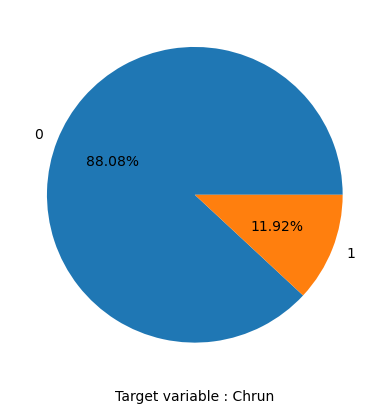

In [14]:
plt.pie(df1['Churn'].value_counts(), radius=1, autopct='%.2f%%', labels= df1['Churn'].unique())
plt.xlabel('Target variable : Chrun')

# There's huge imbalance

There is huge class imbalance in the data with 89 percentage of data with no churn and 11 percentage of data with churn data is yes

### univariate anlayisis

In [15]:
cat.describe().T

,count,unique,top,freq
city,100000,95,Dallas,18861
state,100000,1,TX,100000
county,100000,14,Dallas,37847
has_children,100000,2,1,52733
marital_status,100000,2,Married,61911
home_market_value,100000,19,75000 - 99999,23895
home_owner,100000,2,1,81625
college_degree,100000,2,0,65106
good_credit,100000,2,1,84107
Churn,100000,2,0,88080


In [16]:
for i in cat:
    print(i)
    print('------------')
    print(cat[i].value_counts(normalize=True)*100)
    print('============================')

city
------------
Dallas                   18.861
Fort Worth               13.077
Arlington                 5.868
Plano                     4.951
Garland                   3.671
                          ...  
Era                       0.012
Chatfield                 0.007
Forreston                 0.006
Mertens                   0.004
Naval Air Station Jrb     0.003
Name: city, Length: 95, dtype: float64
state
------------
TX    100.0
Name: state, dtype: float64
county
------------
Dallas      37.847
Tarrant     29.025
Collin      13.060
Denton      11.065
Ellis        2.583
Kaufman      1.862
Rockwall     1.461
Parker       1.429
Johnson      1.394
Hunt         0.113
Cooke        0.100
Navarro      0.032
Grayson      0.025
Hill         0.004
Name: county, dtype: float64
has_children
------------
1    52.733
0    47.267
Name: has_children, dtype: float64
marital_status
------------
Married    61.911
Single     38.089
Name: marital_status, dtype: float64
home_market_value
------------


* From the above data in the city dallas has highrst number of customers with 18 percentage of total customers
* variable state has only one data point i.e TX all the above data is related to TX State
* variable county has highest customers from  dallas - 37 percentage, Tarrant - 29.025 percentage, Collin - 13.060 percentage,Denton - 11.065 percentage
* 53 percentage of the customers have childern, 47 percentage of customers dont have childern
* 24 percentage of customers home market value is in the range of 75000 - 99999
* 81 percentage of customers are own's home and 19 percentage of the population dont own a home
* 85 percentage of the population have good creadit score, 15 percentage of the population dont have good credict score

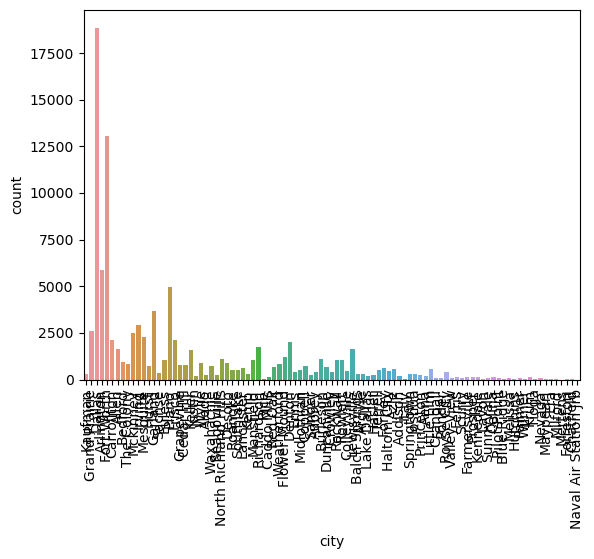

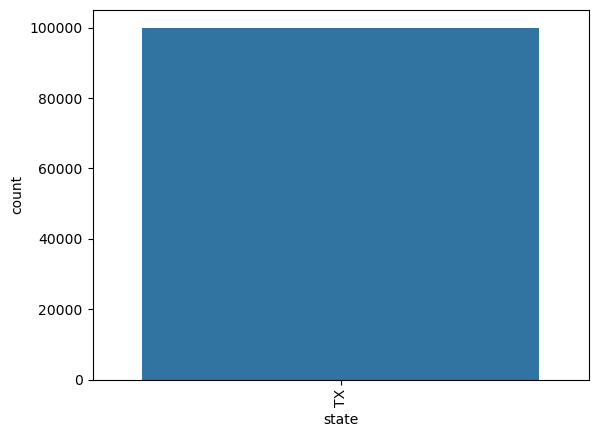

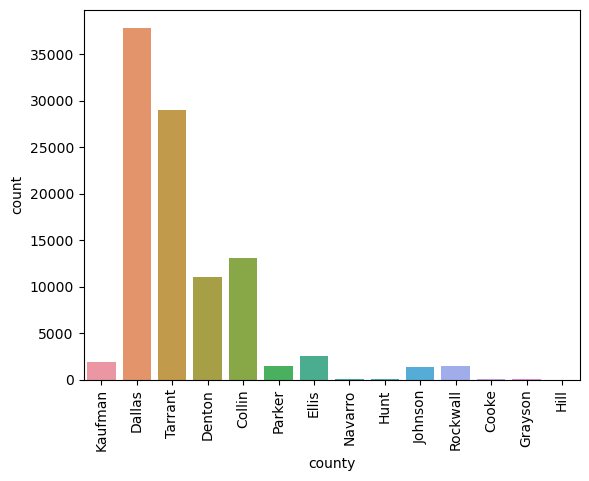

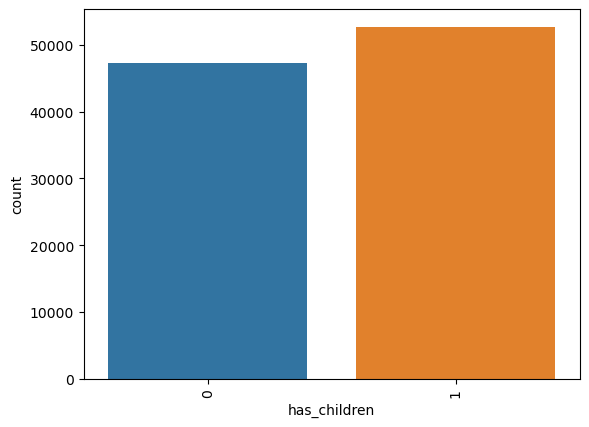

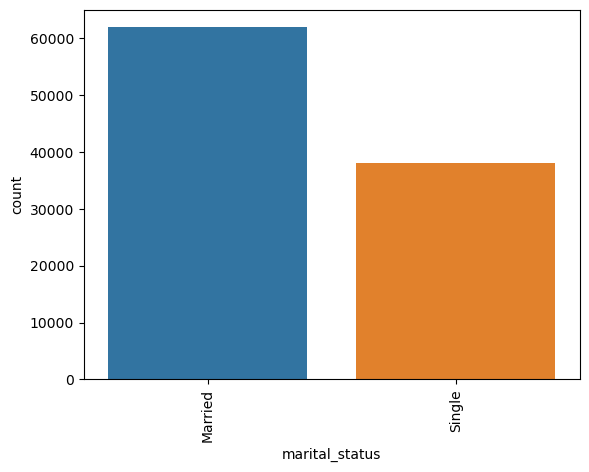

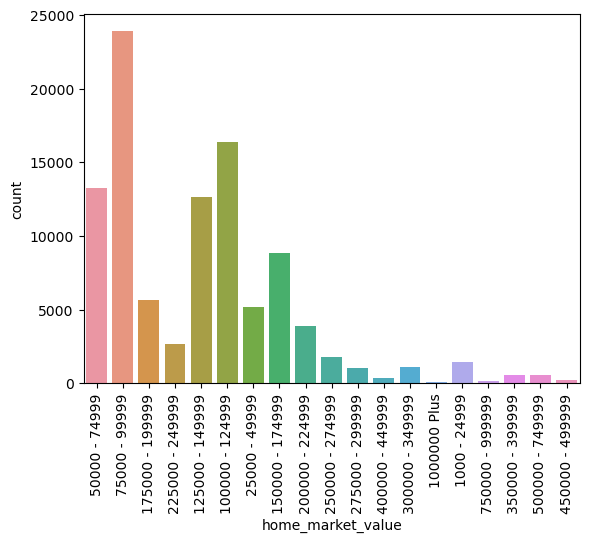

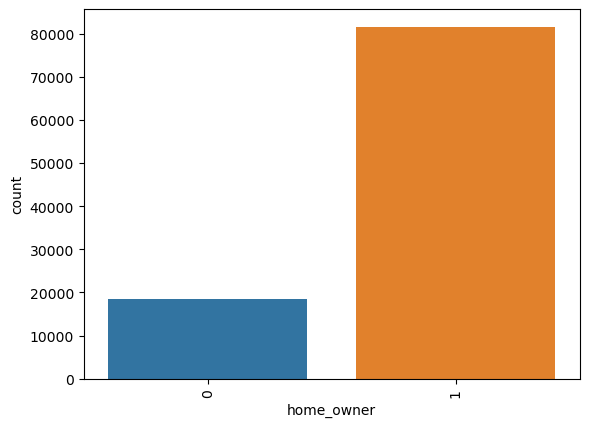

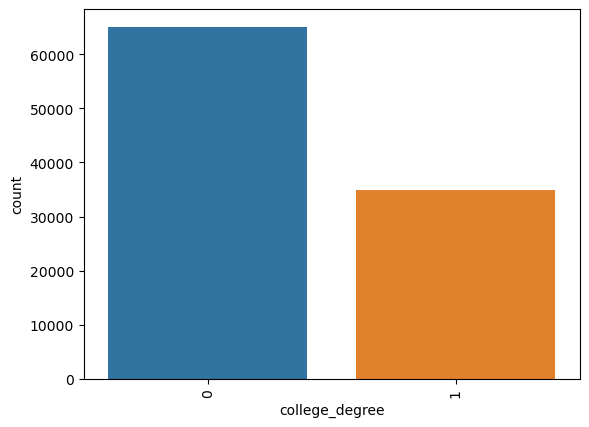

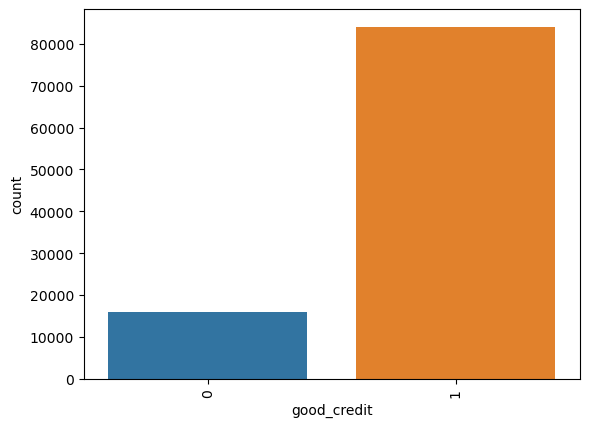

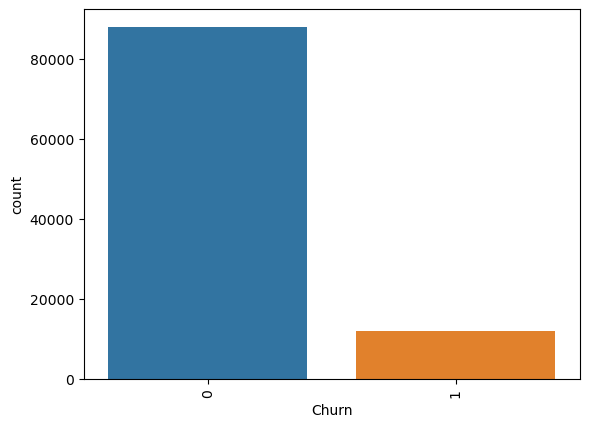

In [17]:
for i in cat:
    sns.countplot(cat[i])
    plt.xticks(rotation=90)
    plt.show()

In [18]:
num.head()

,curr_ann_amt,days_tenure,age_in_years,income,length_of_residence,cust_origin_year
0,818.877997,1454,44,22500.0,15.0,2018
1,974.199182,1795,72,27500.0,2.0,2018
2,967.375112,4818,55,42500.0,10.0,2009
3,992.409561,130,53,125000.0,6.0,2022
4,784.633494,5896,50,87500.0,4.0,2006


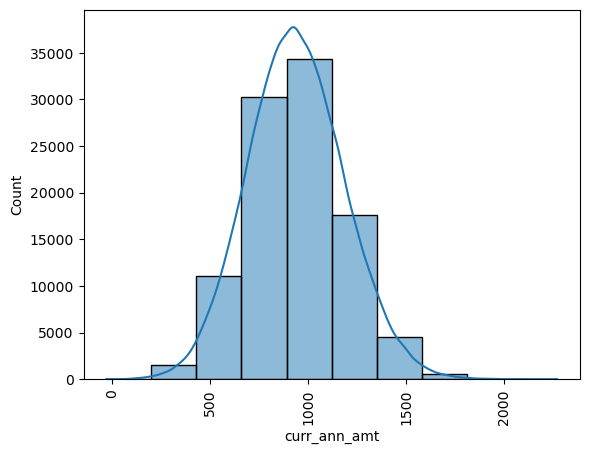

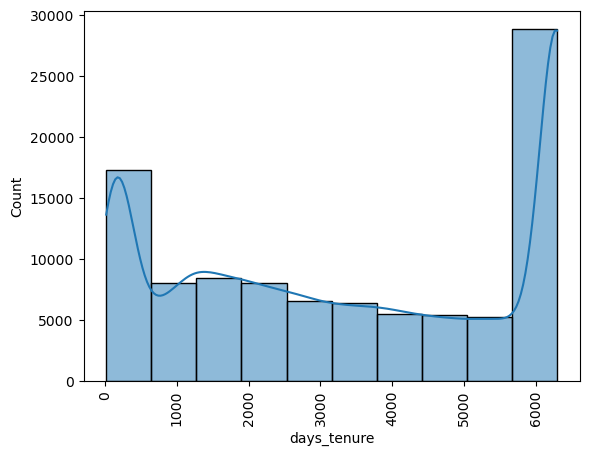

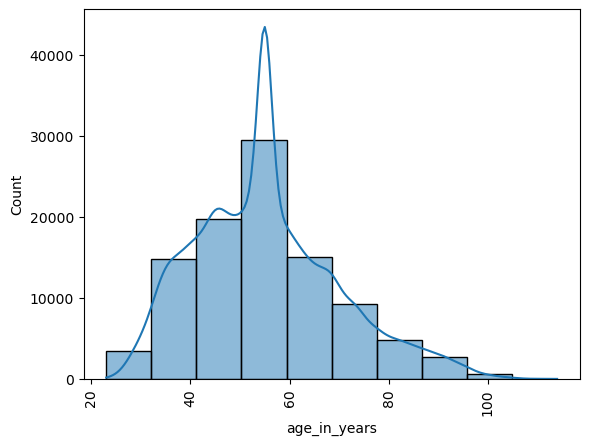

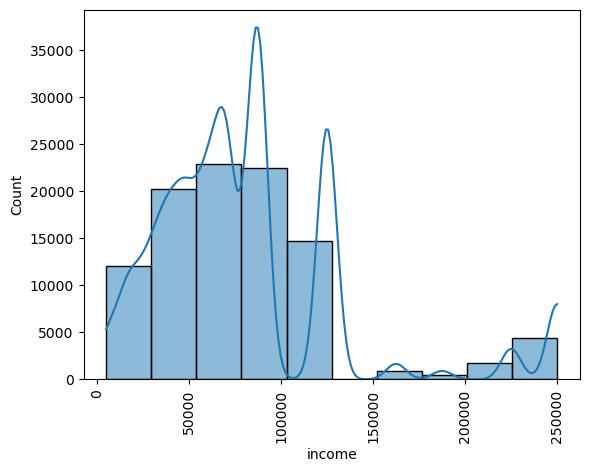

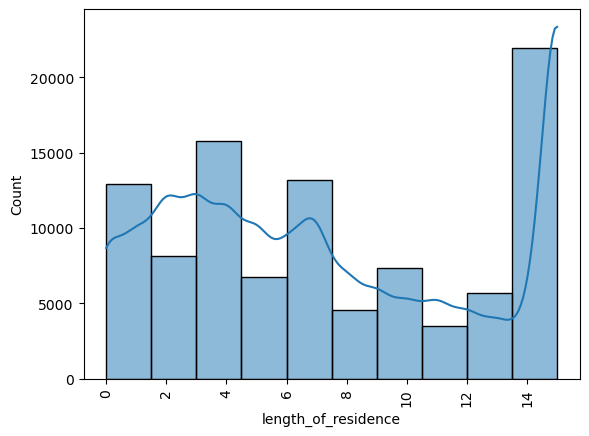

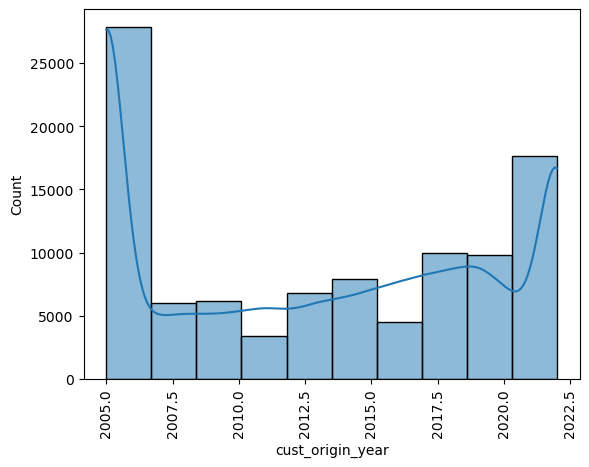

In [19]:
for i in num:
    sns.histplot(num[i],bins=10,kde=True)
    plt.xticks(rotation=90)
    plt.show()
    

In [20]:
num.describe()

,curr_ann_amt,days_tenure,age_in_years,income,length_of_residence,cust_origin_year
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,938.275323,3401.506320,55.240490,81096.646463,7.411644,2013.052500
std,245.896525,2310.125512,14.510631,53765.667329,5.118246,6.384542
min,-31.053997,20.000000,23.000000,5000.000000,0.000000,2005.000000
25%,770.421723,1245.000000,45.000000,47500.000000,3.000000,2005.000000
50%,932.400983,3275.000000,55.000000,70000.000000,6.801000,2013.000000
75%,1100.435273,6215.000000,64.000000,87500.000000,12.000000,2019.000000
max,2269.374081,6291.000000,114.000000,250000.000000,15.000000,2022.000000


* current annual amount:
==========================
* max current annual amount is 2269
* min current annual amount is -31
* average current annual amount is 938

* Days Tenure:
===============
* max days tenure is 6291 days
* min days tenure is 20 days
* avrage days tenure is 3401 days

* Age:
========
* the max age of the customer is 114 yrs
* the min age of the customer is 23 yrs
* the average age of the customer is 55 yrs

* income:
=========
* the max income is 250000
* the mion income is 5000
* the average income is 81096

* lenth of the residence:
 ========================
* max length of the residence 15
* max length of the residence 0
* the average lenth of the residence is 7

### Bi variate analysis

#### target vs categorical variables

In [44]:
for i in cat:
    print(pd.crosstab(df1['Churn'],cat[i]))
    print('=================================')

city   Addison  Aledo  Allen  Anna  Argyle  Arlington  Aubrey  Azle  \
Churn                                                                 
0          176    218   1441   166     284       5154     358   470   
1           26     32    186    24      42        714      50    81   

city   Balch Springs  Bedford  ...  Springtown  Sunnyvale  Terrell  \
Churn                          ...                                   
0                278      836  ...         285         76      437   
1                 44      129  ...          41         11       60   

city   The Colony  Tioga  Valley View  Waxahachie  Weatherford  Wilmer  Wylie  
Churn                                                                          
0             730     23           76         612          751      52    776  
1              99      2           12          91          102       4    100  

[2 rows x 95 columns]
state     TX
Churn       
0      88080
1      11920
county  Collin  Cooke  Dallas  Denton  

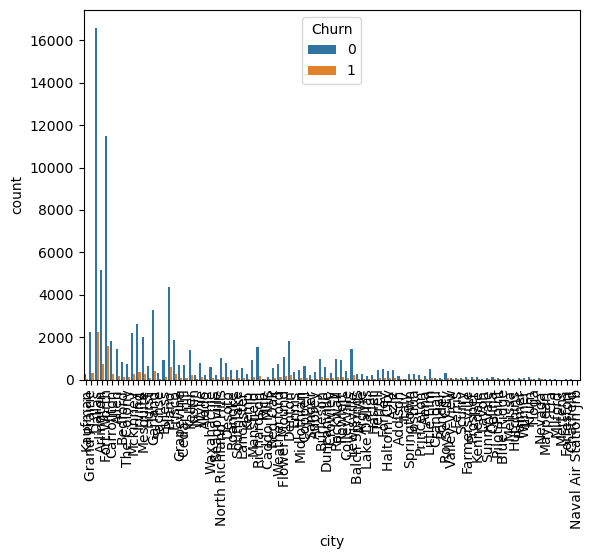

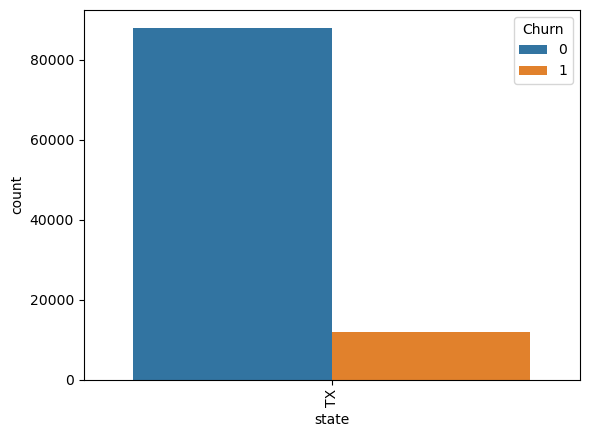

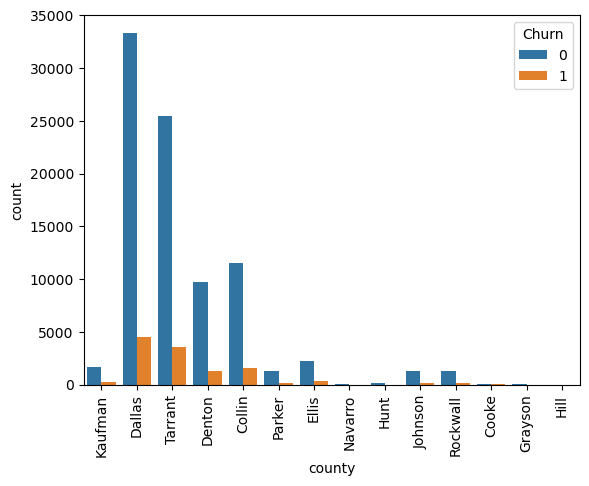

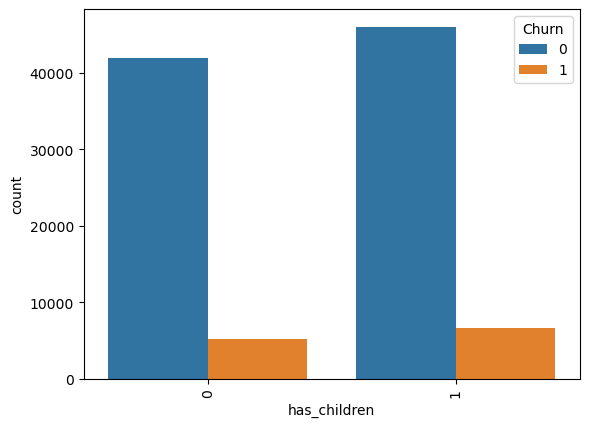

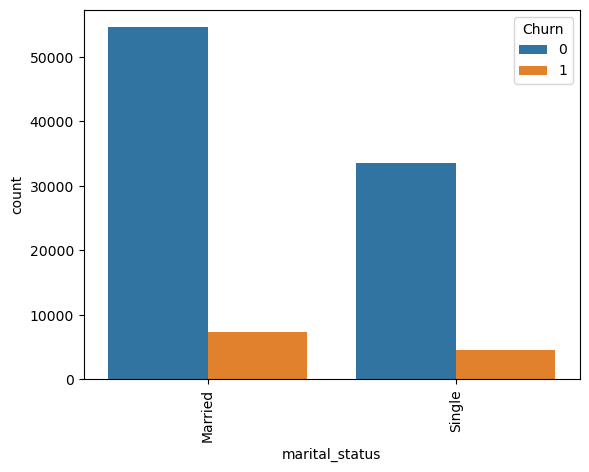

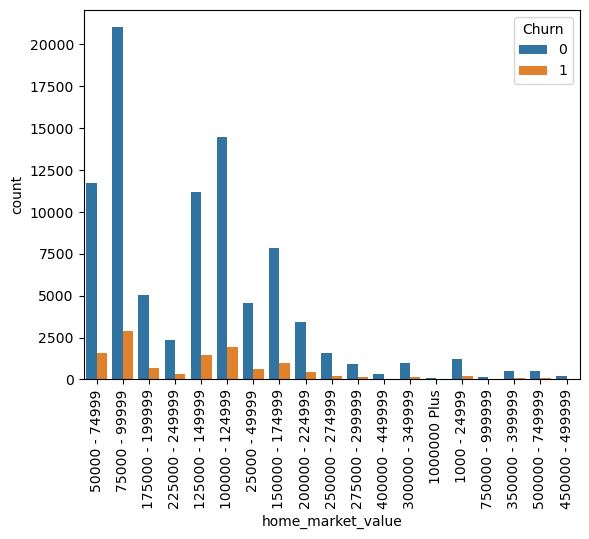

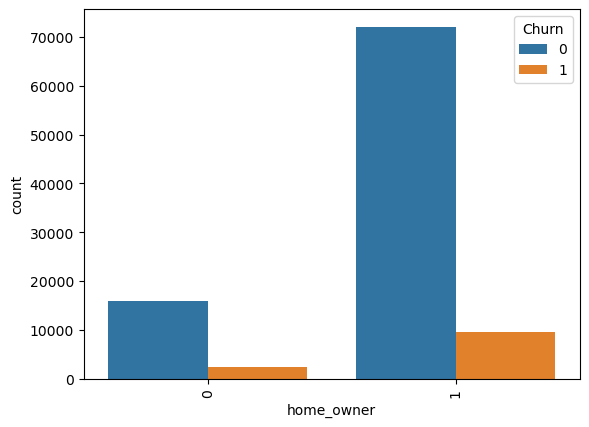

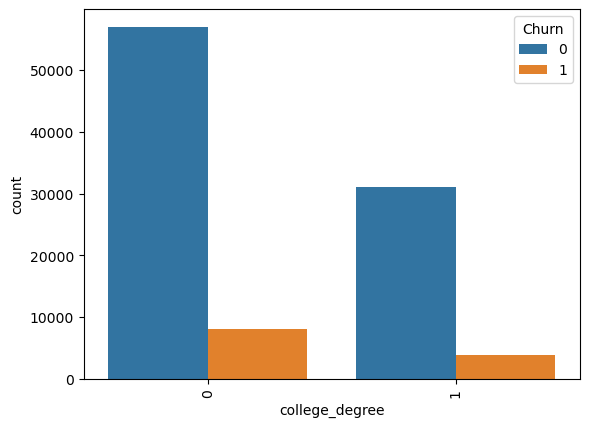

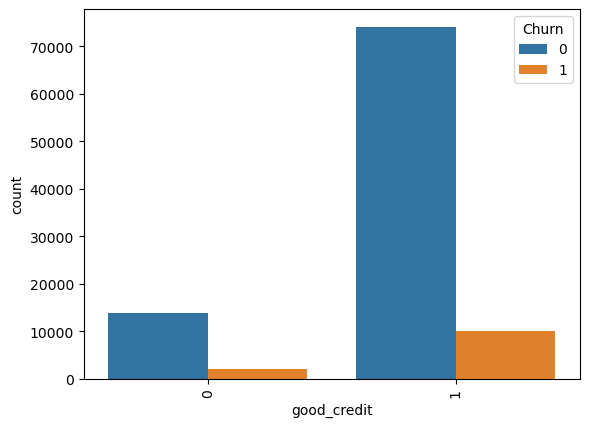

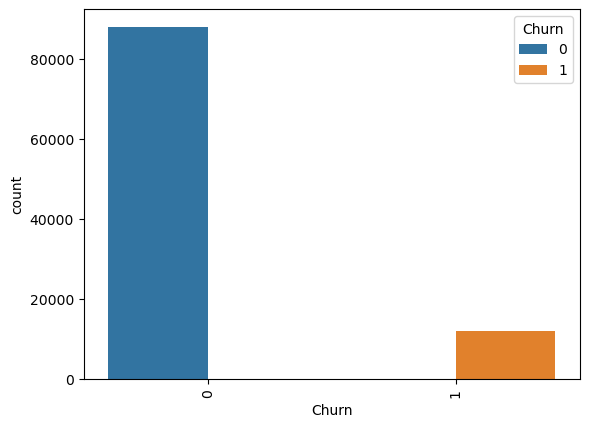

In [21]:
for i in cat:
    sns.countplot(cat[i],hue=df1['Churn'])
    plt.xticks(rotation=90)
    plt.show()

#### target variable vs numeric variable

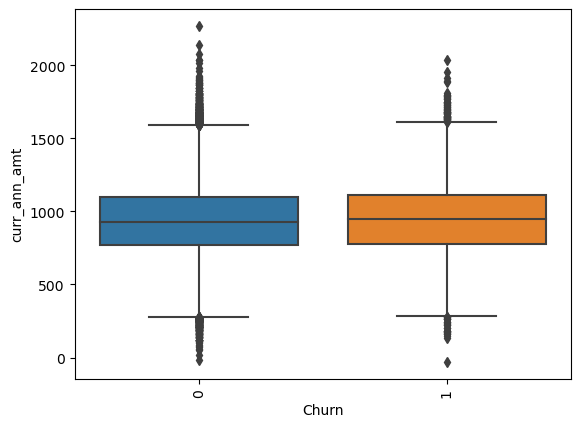

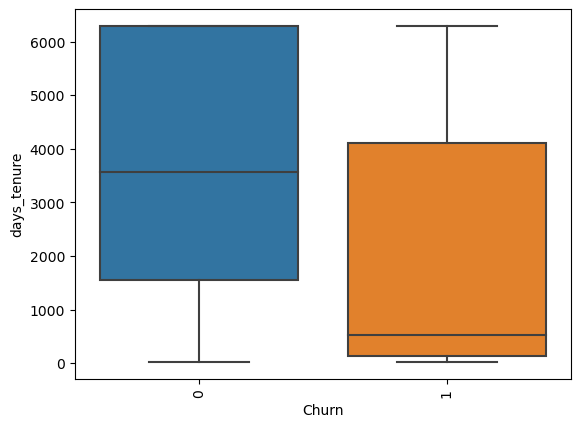

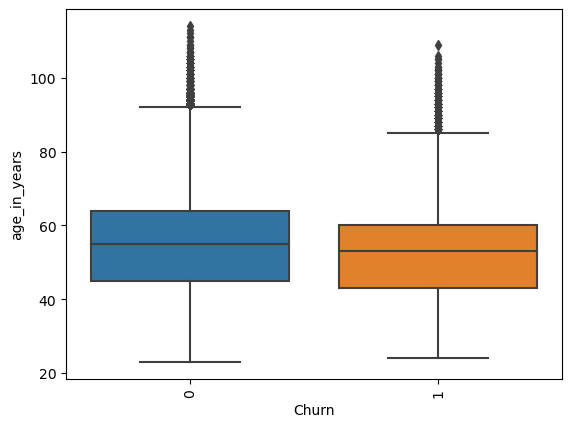

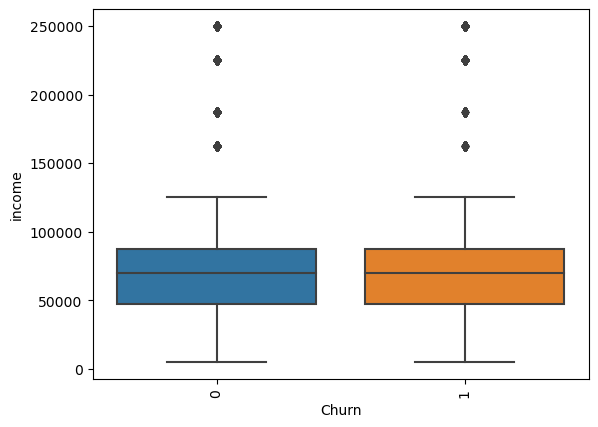

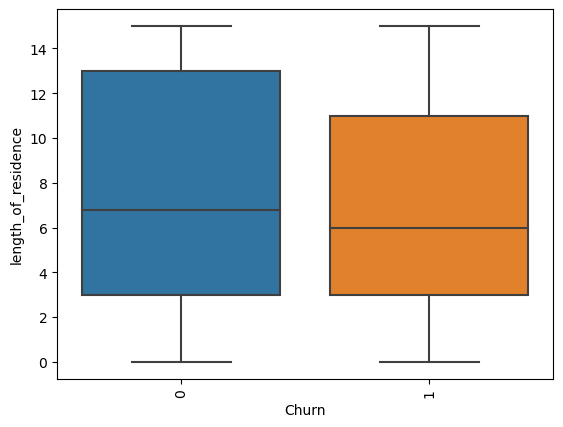

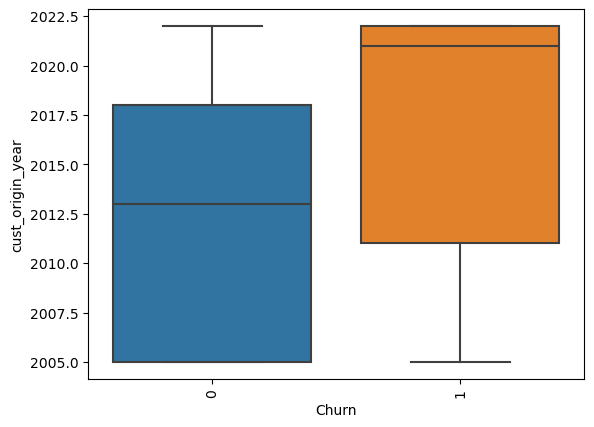

In [22]:
for i in num:
    sns.boxplot(x=df1['Churn'],y=num[i])
    plt.xticks(rotation=90)
    plt.show()

### multi variate

<AxesSubplot:>

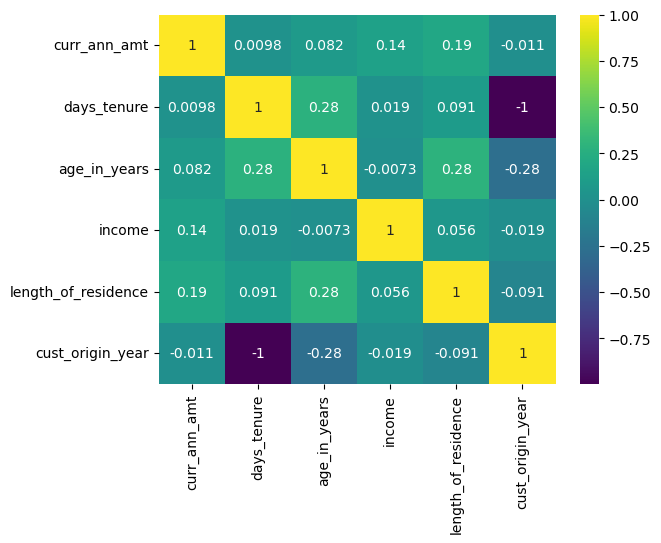

In [23]:
sns.heatmap(df1.corr(),annot=True,cmap='viridis')

### outliers detection

In [24]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
lower_limit = Q1 - threshold * IQR
upper_limit = Q3 + threshold * IQR


df_out = df[((df < lower_limit) | (df > upper_limit)).any(axis=1)]
df_out.shape




(45362, 23)

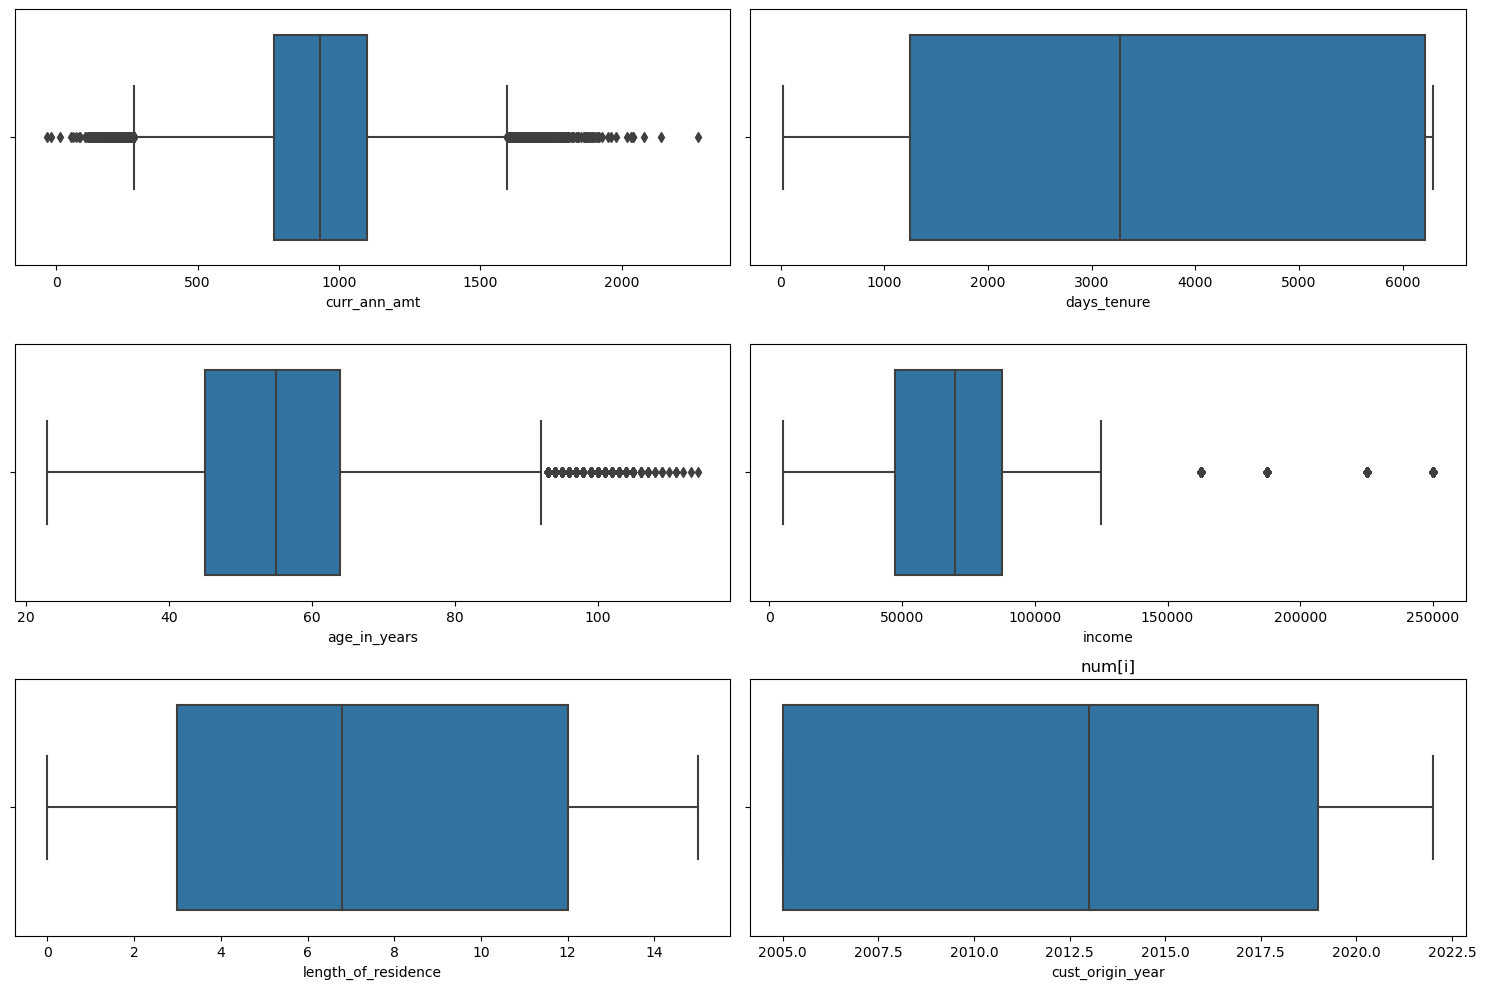

In [25]:
fig,ax= plt.subplots(3,2,figsize=(15,10))

for i,subplots in zip(num,ax.flatten()):
    sns.boxplot(x=num[i], ax=subplots)
    plt.title('num[i]')
plt.tight_layout()


### There is presence of outliers:

* Income
* Current Annual Amount
* Age in Years

### Statistical Test

In [26]:
import scipy.stats as stats

In [27]:
no=df1[df1['Churn']==0]['curr_ann_amt']
yes=df1[df1['Churn']==1]['curr_ann_amt']
stats.f_oneway(no,yes)
# Current annual amount is not significant variable

F_onewayResult(statistic=44.3262900958147, pvalue=2.7938781200635756e-11)

In [28]:
no=df1[df1['Churn']==0]['days_tenure']
yes=df1[df1['Churn']==1]['days_tenure']
stats.f_oneway(no,yes)
# days tenure is significant variable 

F_onewayResult(statistic=4655.9205395701865, pvalue=0.0)

In [29]:
no=df1[df1['Churn']==0]['age_in_years']
yes=df1[df1['Churn']==1]['age_in_years']
stats.f_oneway(no,yes)
# age is not significant variable 

F_onewayResult(statistic=337.91146319445596, pvalue=2.4218657763388483e-75)

In [30]:
no=df1[df1['Churn']==0]['income']
yes=df1[df1['Churn']==1]['income']
stats.f_oneway(no,yes)
# income is not  significant variable 

F_onewayResult(statistic=0.0009037154911937722, pvalue=0.9760177773159141)

In [31]:
no=df1[df1['Churn']==0]['length_of_residence']
yes=df1[df1['Churn']==1]['length_of_residence']
stats.f_oneway(no,yes)
# length of residence is not significant variable 

F_onewayResult(statistic=149.74626073844954, pvalue=2.0848172680792824e-34)

In [32]:
no=df1[df1['Churn']==0]['cust_origin_year']
yes=df1[df1['Churn']==1]['cust_origin_year']
stats.f_oneway(no,yes)
# 'cust_origin_year' is significant variable 

F_onewayResult(statistic=4541.871416047319, pvalue=0.0)

In [33]:
city=pd.crosstab(df1['Churn'],df1['city'])
stats.chi2_contingency(city)
# city is not significant variable

(100.5413549456571,
 0.3033427577449522,
 94,
 array([[1.77921600e+02, 2.20200000e+02, 1.43306160e+03, 1.67352000e+02,
         2.87140800e+02, 5.16853440e+03, 3.59366400e+02, 4.85320800e+02,
         2.83617600e+02, 8.49972000e+02, 4.66824000e+01, 9.63595200e+02,
         9.95304000e+01, 1.84527600e+03, 6.72931200e+02, 1.26835200e+02,
         6.16560000e+00, 3.86671200e+02, 6.36818400e+02, 7.75104000e+01,
         3.40869600e+02, 1.66127688e+04, 1.78450080e+03, 7.94481600e+02,
         6.09513600e+02, 3.54962400e+02, 1.05696000e+01, 9.11628000e+02,
         1.45332000e+02, 9.95304000e+01, 1.07281440e+03, 5.29360800e+02,
         5.28480000e+00, 1.15182216e+04, 1.87081920e+03, 3.23341680e+03,
         2.28743760e+03, 7.07282400e+02, 4.06048800e+02, 2.35173600e+02,
         6.53553600e+02, 4.31592000e+01, 2.58514800e+03, 4.40400000e+01,
         2.64240000e+02, 1.92014400e+02, 2.80975200e+02, 1.41016080e+03,
         2.47504800e+02, 1.26835200e+02, 1.11861600e+02, 1.69113600e+02,
     

In [34]:
state=pd.crosstab(df1['Churn'],df1['state'])
stats.chi2_contingency(state)
# state is not significant variable

(0.0,
 1.0,
 0,
 array([[88080.],
        [11920.]]))

In [35]:
county=pd.crosstab(df1['Churn'],df1['county'])
stats.chi2_contingency(county)
# Country is not significant variable

(18.91883401066847,
 0.12564180004837583,
 13,
 array([[1.15032480e+04, 8.80800000e+01, 3.33356376e+04, 9.74605200e+03,
         2.27510640e+03, 2.20200000e+01, 3.52320000e+00, 9.95304000e+01,
         1.22783520e+03, 1.64004960e+03, 2.81856000e+01, 1.25866320e+03,
         1.28684880e+03, 2.55652200e+04],
        [1.55675200e+03, 1.19200000e+01, 4.51136240e+03, 1.31894800e+03,
         3.07893600e+02, 2.98000000e+00, 4.76800000e-01, 1.34696000e+01,
         1.66164800e+02, 2.21950400e+02, 3.81440000e+00, 1.70336800e+02,
         1.74151200e+02, 3.45978000e+03]]))

In [36]:
marital=pd.crosstab(df1['Churn'],df1['marital_status'])
stats.chi2_contingency(marital)
# marital is not significant variable

(0.4749461981052573,
 0.4907204433806912,
 1,
 array([[54531.2088, 33548.7912],
        [ 7379.7912,  4540.2088]]))

In [37]:
hm=pd.crosstab(df1['Churn'],df1['home_market_value'])
stats.chi2_contingency(hm)
# home market value is not significant variable

(13.846865359475352,
 0.7390179328659974,
 18,
 array([[1.26130560e+03, 1.44530472e+04, 1.09219200e+02, 1.11315504e+04,
         7.77394080e+03, 5.00118240e+03, 3.44040480e+03, 2.33588160e+03,
         4.55197440e+03, 1.56430080e+03, 9.49502400e+02, 9.98827200e+02,
         5.34645600e+02, 3.24134400e+02, 2.26365600e+02, 1.16926200e+04,
         5.16148800e+02, 2.10467160e+04, 1.68232800e+02],
        [1.70694400e+02, 1.95595280e+03, 1.47808000e+01, 1.50644960e+03,
         1.05205920e+03, 6.76817600e+02, 4.65595200e+02, 3.16118400e+02,
         6.16025600e+02, 2.11699200e+02, 1.28497600e+02, 1.35172800e+02,
         7.23544000e+01, 4.38656000e+01, 3.06344000e+01, 1.58238000e+03,
         6.98512000e+01, 2.84828400e+03, 2.27672000e+01]]))

In [38]:
ho=pd.crosstab(df1['Churn'],df1['home_owner'])
stats.chi2_contingency(ho)
# home owner is not significant variable

(33.35992942451388,
 7.658579323352196e-09,
 1,
 array([[16184.7, 71895.3],
        [ 2190.3,  9729.7]]))

In [39]:
cd=pd.crosstab(df1['Churn'],df1['college_degree'])
stats.chi2_contingency(cd)
# collage degree is not significant variable

(41.56453169417487,
 1.1404362199529494e-10,
 1,
 array([[57345.3648, 30734.6352],
        [ 7760.6352,  4159.3648]]))

In [40]:
gc=pd.crosstab(df1['Churn'],df1['good_credit'])
stats.chi2_contingency(gc)
# good credict is not significant variable

(4.230612993491726,
 0.039701099556293994,
 1,
 array([[13998.5544, 74081.4456],
        [ 1894.4456, 10025.5544]]))

* Inference of Statistical Test:
=================================

* Current annual amount is not significant variable
* Days tenure is significant variable
* Age is not significant variable
* Income is not  significant variable
* Length of residence is not significant variable
* Cust_origin_year is significant variable 
* City is not significant variable
* State is not significant variable
* Country is not significant variable
* Marital is not significant variable
* Home market value is not significant variable
* Home owner is not significant variable
* Collage degree is not significant variable
* Good credict is not significant variable


### outlier treatment

In outlier Treatment we are using Power Transformation

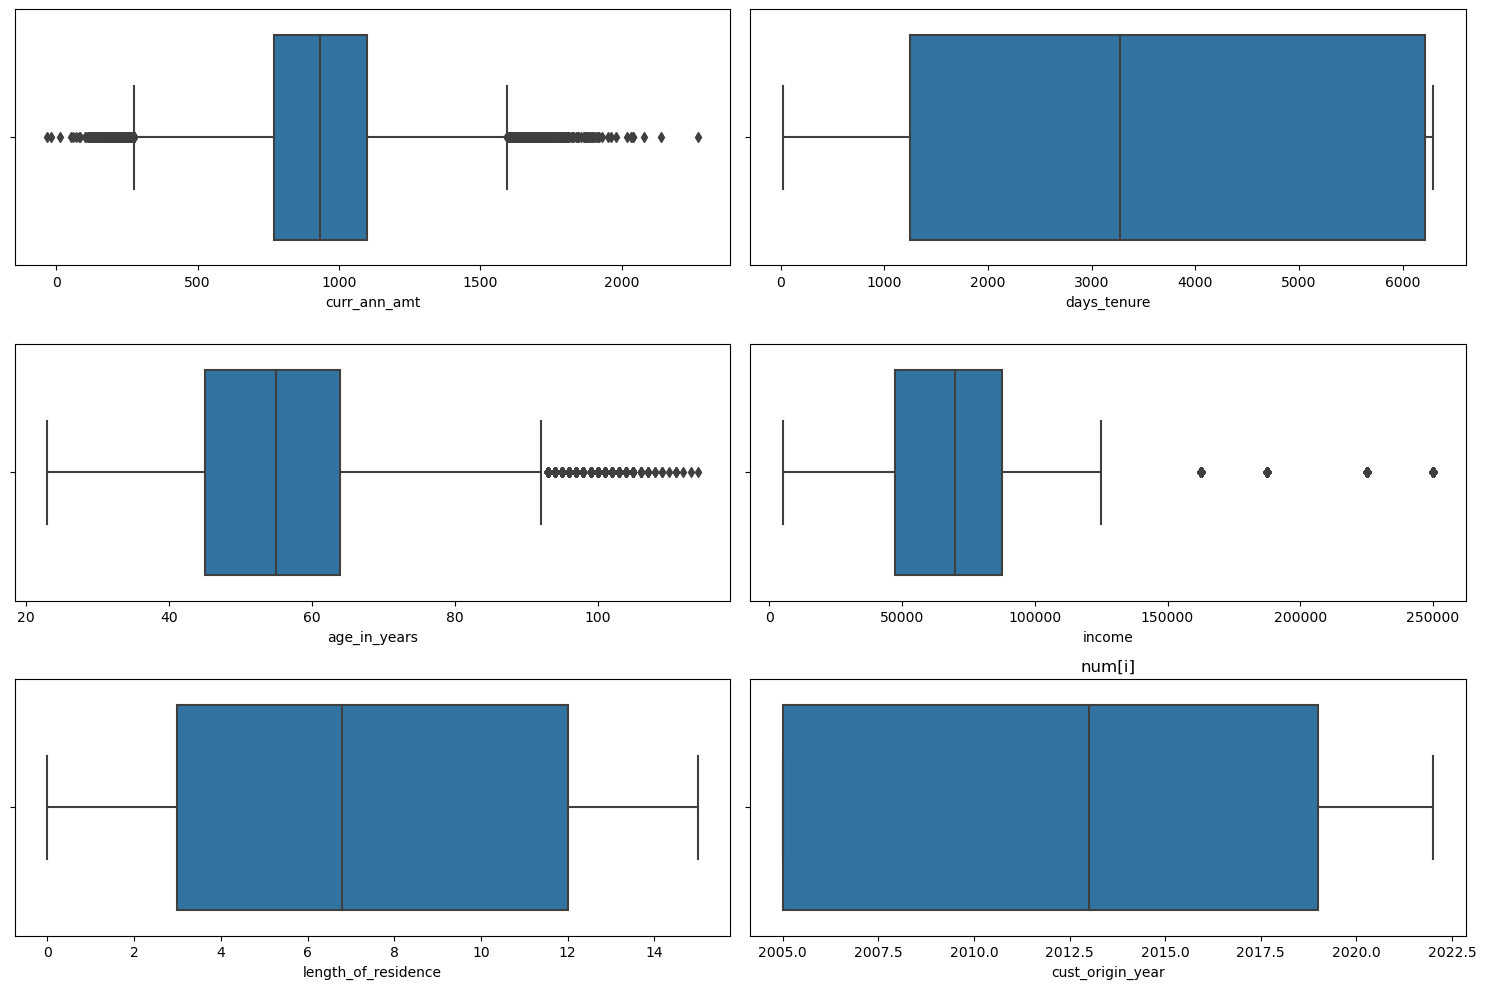

In [41]:
# Before treating outliers
fig,ax= plt.subplots(3,2,figsize=(15,10))

for i,subplots in zip(num,ax.flatten()):
    sns.boxplot(x=num[i], ax=subplots)
    plt.title('num[i]')
plt.tight_layout()


In [42]:
from sklearn.preprocessing import PowerTransformer
pt =PowerTransformer(standardize=False)

In [43]:
for i in num:
    num[i] = pt.fit_transform(num[[i]])

In [44]:
num.head()

,curr_ann_amt,days_tenure,age_in_years,income,length_of_residence,cust_origin_year
0,363.078715,123.020659,5.246528,73.429483,5.986978,0.567336
1,421.384699,139.525532,6.172987,78.487963,1.462978,0.567336
2,418.852711,251.188630,5.656420,90.640057,4.624756,0.567336
3,428.128999,28.416913,5.587255,129.135533,3.286750,0.567336
4,350.017764,283.192186,5.479362,114.917851,2.469252,0.567336


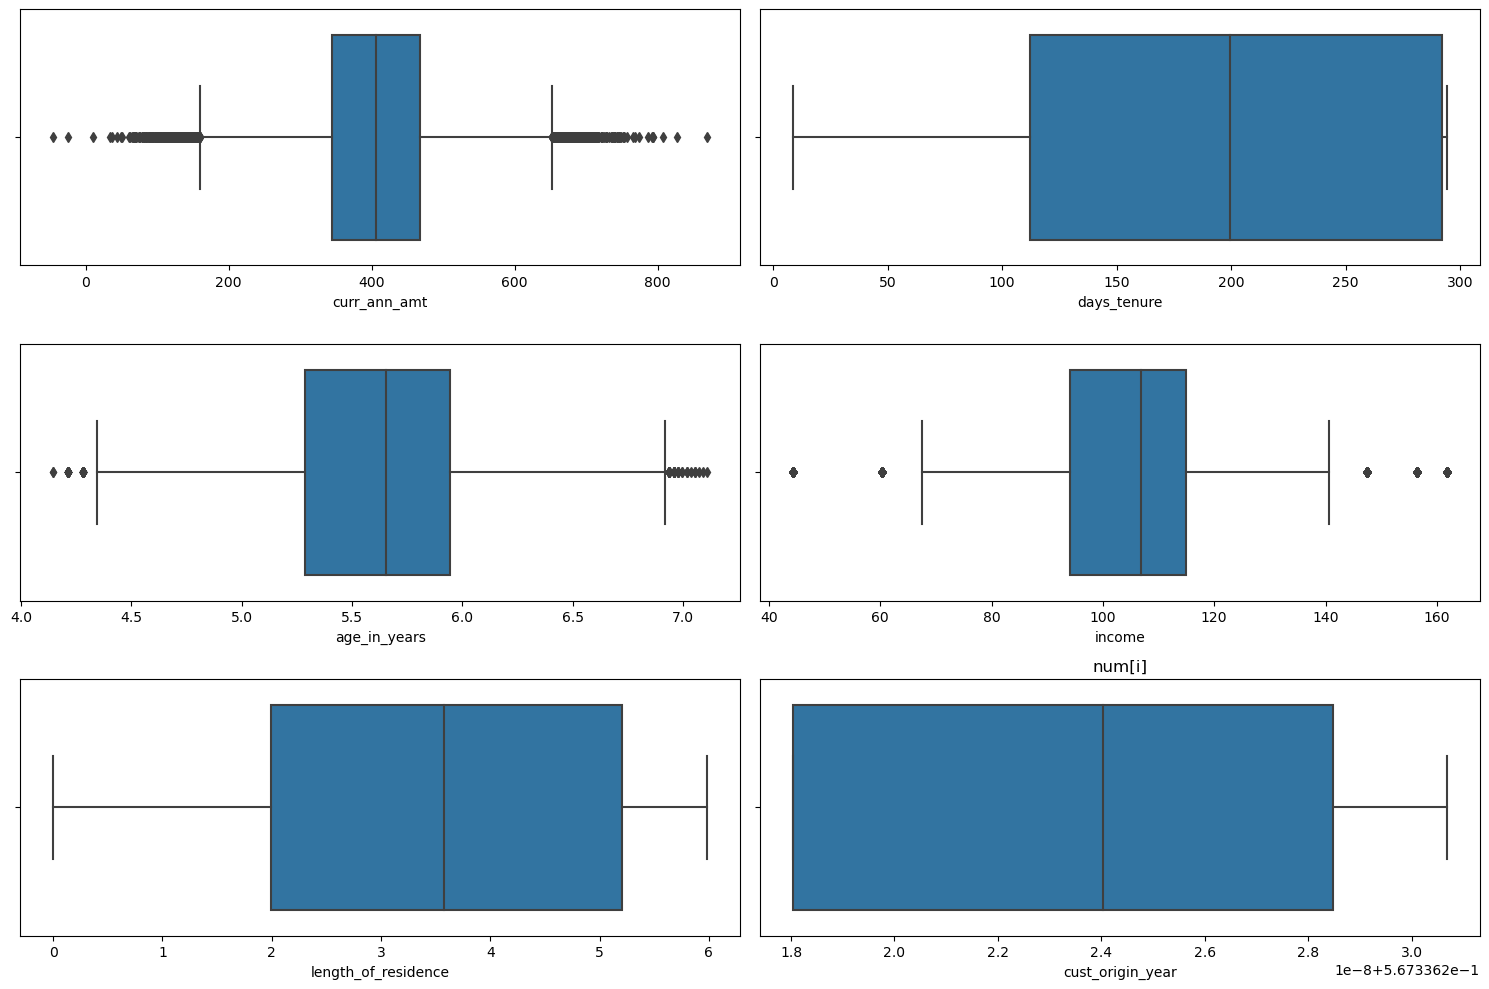

In [45]:
# After treating outliers
fig,ax= plt.subplots(3,2,figsize=(15,10))

for i,subplots in zip(num,ax.flatten()):
    sns.boxplot(x=num[i], ax=subplots)
    plt.title('num[i]')
plt.tight_layout()


### Encoding

In Encoding we have used Label Encoding insted of Dummy encoding because dummy encoding causes complexcity of model by increasing number of columns


In [46]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,PowerTransformer

In [47]:
le = LabelEncoder()

In [48]:
for i in cat:
    cat[i] = le.fit_transform(cat[i])
cat.head()

,city,state,county,has_children,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,46,0,9,1,0,15,1,1,1,0
1,36,0,2,0,1,15,1,0,0,0
2,21,0,2,0,0,17,1,0,0,0
3,5,0,13,1,0,5,1,0,1,1
4,33,0,13,1,0,7,1,1,1,0


In [49]:
final_df = pd.concat([num,cat],axis=1)

In [50]:
final_df

,curr_ann_amt,days_tenure,age_in_years,income,length_of_residence,cust_origin_year,city,state,county,has_children,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,363.078715,123.020659,5.246528,73.429483,5.986978,0.567336,46,0,9,1,0,15,1,1,1,0
1,421.384699,139.525532,6.172987,78.487963,1.462978,0.567336,36,0,2,0,1,15,1,0,0,0
2,418.852711,251.188630,5.656420,90.640057,4.624756,0.567336,21,0,2,0,0,17,1,0,0,0
3,428.128999,28.416913,5.587255,129.135533,3.286750,0.567336,5,0,13,1,0,5,1,0,1,1
4,350.017764,283.192186,5.479362,114.917851,2.469252,0.567336,33,0,13,1,0,7,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,448.477174,268.646210,5.820667,129.135533,0.828038,0.567336,21,0,2,1,1,14,0,0,1,0
99996,301.308313,107.851060,5.031652,129.135533,0.000000,0.567336,21,0,0,1,0,17,0,0,1,0
99997,349.098398,130.554219,5.656420,129.135533,1.462978,0.567336,77,0,12,0,1,3,1,0,1,0
99998,358.375496,160.168453,5.788746,114.917851,2.895166,0.567336,37,0,13,0,1,3,1,1,1,0


In [51]:
x = final_df.drop('Churn',axis=1)

In [52]:
y = final_df['Churn']

Note:
=====
* Intial in the data, the target variable has huge class imbalance with 12 percentage - yes and 88 percentage  - no
* checking model accuracy initally with out applying resampling technique even we have huge class imbalance in the data

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=8363)

In [55]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(70000, 15)
(30000, 15)
(70000,)
(30000,)


### Multicollinearity test

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
vif=[]
for i in range(xtrain.shape[1]):
    vif.append(variance_inflation_factor(xtrain.values,i))
pd.DataFrame({'Features':xtrain.columns,'VIF':vif})

,Features,VIF
0,curr_ann_amt,1.065730
1,days_tenure,1.074031
2,age_in_years,1.203331
3,income,1.281771
4,length_of_residence,1.307522
5,cust_origin_year,204.864909
6,city,1.037115
7,state,NaN
8,county,1.038110
9,has_children,1.093362


##### Inference
* customer origin year is the only variable which have high multicollinearity

### scaling

In [58]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [59]:
xtrain_s=pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)

In [60]:
xtest_s=pd.DataFrame(ss.fit_transform(xtest),columns=xtest.columns)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr=LogisticRegression()

In [63]:
lr.fit(xtrain_s,ytrain)

LogisticRegression()

In [64]:
lr.intercept_

array([-2.25787989])

In [65]:
pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)

,0,0
0,curr_ann_amt,-0.012692
1,days_tenure,-3.776602
2,age_in_years,-0.057052
3,income,0.004813
4,length_of_residence,-0.096454
5,cust_origin_year,-3.270379
6,city,-0.016413
7,state,0.000000
8,county,0.017679
9,has_children,0.055711


In [66]:
ypred_lr_train=lr.predict(xtrain_s)
ypred_lr=lr.predict(xtest_s)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,roc_curve,f1_score

In [68]:
print(accuracy_score(ytrain,ypred_lr_train))
print(confusion_matrix(ytrain,ypred_lr_train))
print(classification_report(ytrain,ypred_lr_train))

0.8800142857142857
[[61134   441]
 [ 7958   467]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     61575
           1       0.51      0.06      0.10      8425

    accuracy                           0.88     70000
   macro avg       0.70      0.52      0.52     70000
weighted avg       0.84      0.88      0.84     70000



In [69]:
print(accuracy_score(ytest,ypred_lr))
print(confusion_matrix(ytest,ypred_lr))
print(classification_report(ytest,ypred_lr))

0.8832666666666666
[[26291   214]
 [ 3288   207]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     26505
           1       0.49      0.06      0.11      3495

    accuracy                           0.88     30000
   macro avg       0.69      0.53      0.52     30000
weighted avg       0.84      0.88      0.84     30000



In [70]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(ytest,ypred_lr))

0.08274350318119328


In [71]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [72]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

In [73]:
def per_measures(model,test,pred):


  accuracy    =accuracy_score(test,pred)
  f1score     =f1_score(test,pred)
  recall      =recall_score(test,pred)
  precision   =precision_score(test,pred)
  
  return (accuracy,recall,precision,f1score,)

In [74]:
def update_performance (name,
                        model,
                        test,
                        pred
                           ):

    
    global perf_score


    
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                    

                                     },
                                   ignore_index = True)

In [75]:
update_performance(name = 'LogisticReg-Base', model = lr, test = ytest, pred= ypred_lr)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.10572


In [76]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()

In [77]:
KNN_model=KNN.fit(xtrain_s,ytrain)

In [78]:
ypred_KNN=KNN_model.predict(xtest_s)

In [79]:
print(accuracy_score(ytest,ypred_KNN))
print(confusion_matrix(ytest,ypred_KNN))
print(classification_report(ytest,ypred_KNN))

0.8763666666666666
[[25832   673]
 [ 3036   459]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     26505
           1       0.41      0.13      0.20      3495

    accuracy                           0.88     30000
   macro avg       0.65      0.55      0.57     30000
weighted avg       0.84      0.88      0.85     30000



In [80]:
update_performance(name = 'KNN', model = KNN, test = ytest, pred= ypred_KNN)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401


In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
grid_search = GridSearchCV(estimator=KNN,param_grid={'n_neighbors' :[i for i in range(2,10)],
                                                     'p':[1,2]},scoring='accuracy',cv=5)

In [83]:
grid_search.fit(xtrain_s,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9], 'p': [1, 2]},
             scoring='accuracy')

In [84]:
grid_search.best_params_

{'n_neighbors': 8, 'p': 2}

In [85]:
# best params : {'n_neighbors': 8, 'p': 2}

In [81]:
knn = KNeighborsClassifier(n_neighbors=8,p=2)
knn.fit(xtrain_s,ytrain)

KNeighborsClassifier(n_neighbors=8)

In [82]:
ypred_knn_t = knn.predict(xtest)

In [83]:
print(accuracy_score(ytest,ypred_knn_t))
print(confusion_matrix(ytest,ypred_knn_t))
print(classification_report(ytest,ypred_knn_t))

0.8835
[[26505     0]
 [ 3495     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     26505
           1       0.00      0.00      0.00      3495

    accuracy                           0.88     30000
   macro avg       0.44      0.50      0.47     30000
weighted avg       0.78      0.88      0.83     30000



In [84]:
update_performance(name = 'KNN-Tunned', model = knn, test = ytest, pred= ypred_knn_t)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000


In [85]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [86]:
GNB_model = GNB.fit(xtrain_s,ytrain)

In [87]:
ypred_GNB=GNB_model.predict(xtest_s)

In [88]:
print(accuracy_score(ytest,ypred_GNB))
print(confusion_matrix(ytest,ypred_GNB))
print(classification_report(ytest,ypred_GNB))

0.8789333333333333
[[25327  1178]
 [ 2454  1041]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     26505
           1       0.47      0.30      0.36      3495

    accuracy                           0.88     30000
   macro avg       0.69      0.63      0.65     30000
weighted avg       0.86      0.88      0.87     30000



In [89]:
update_performance(name = 'Gaussian naive bayes', model = GNB, test = ytest, pred= ypred_GNB)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368


In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dt = DecisionTreeClassifier(random_state=10)

dt.fit(xtrain,ytrain)

ypred_dt=dt.predict(xtest)
ypred_train_dt=dt.predict(xtrain)


In [92]:
print(accuracy_score(ytest,ypred_dt))
print(confusion_matrix(ytest,ypred_dt))
print(classification_report(ytest,ypred_dt))

0.8081
[[23322  3183]
 [ 2574   921]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     26505
           1       0.22      0.26      0.24      3495

    accuracy                           0.81     30000
   macro avg       0.56      0.57      0.57     30000
weighted avg       0.82      0.81      0.81     30000



In [93]:
print(accuracy_score(ytrain,ypred_train_dt))
print(confusion_matrix(ytrain,ypred_train_dt))
print(classification_report(ytrain,ypred_train_dt))

1.0
[[61575     0]
 [    0  8425]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61575
           1       1.00      1.00      1.00      8425

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000



In [94]:
update_performance(name = 'DecisionTreeClassifier', model = dt, test = ytest, pred= ypred_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400


In [117]:
from sklearn.model_selection import GridSearchCV

In [153]:
tuned_paramaters = [{'criterion': ['entropy','gini'],
                     'max_depth': [2,3,5,6,7,8,9,10],
                     'max_leaf_nodes': [5,8],
                     'min_samples_leaf': [1,5,9],
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': [2,5,8]
                     
}]

In [154]:
dt =DecisionTreeClassifier(random_state=10)
tree_grid = GridSearchCV(estimator=dt,param_grid=tuned_paramaters,cv=5)

In [155]:
tree_grid_model = tree_grid.fit(xtrain, ytrain)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [95]:
dt_grid_model = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 2,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 5,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 10)

In [96]:
dt_grid_model = dt_grid_model.fit(xtrain,ytrain)

In [97]:
ypred_dt_tp = dt_grid_model.predict(xtest)

In [98]:
print(accuracy_score(ytest,ypred_dt_tp))
print(confusion_matrix(ytest,ypred_dt_tp))
print(classification_report(ytest,ypred_dt_tp))

0.8835
[[26505     0]
 [ 3495     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     26505
           1       0.00      0.00      0.00      3495

    accuracy                           0.88     30000
   macro avg       0.44      0.50      0.47     30000
weighted avg       0.78      0.88      0.83     30000



In [99]:
update_performance(name = 'DecisionTreeClassifier tunned', model = dt_grid_model, test = ytest, pred= ypred_dt_tp)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000


In [100]:
perf_score.loc[:,:]

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000


Inference of Non Resampled models:
==================================
* All the above models and related score are based on with out resampling
* even there is huge class imbalance
* from the above models Gaussian navie bayes is performing well compared to all others

### Class imbalance in target variable

Text(0.5, 0, 'Target variable : Chrun')

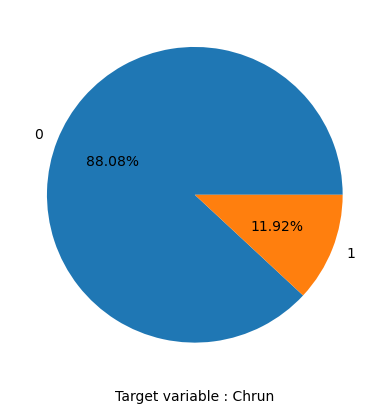

In [101]:
plt.pie(df1['Churn'].value_counts(), radius=1, autopct='%.2f%%', labels= df1['Churn'].unique())
plt.xlabel('Target variable : Chrun')

# There's huge imbalance

#### Resampling using SMOTE

In [102]:
from imblearn.over_sampling import SMOTE
xr,yr=SMOTE(sampling_strategy=0.5).fit_resample(x,y)
dfs=pd.concat([xr,pd.DataFrame(yr)],axis=1)
dfs

,curr_ann_amt,days_tenure,age_in_years,income,length_of_residence,cust_origin_year,city,state,county,has_children,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,363.078715,123.020659,5.246528,73.429483,5.986978,0.567336,46,0,9,1,0,15,1,1,1,0
1,421.384699,139.525532,6.172987,78.487963,1.462978,0.567336,36,0,2,0,1,15,1,0,0,0
2,418.852711,251.188630,5.656420,90.640057,4.624756,0.567336,21,0,2,0,0,17,1,0,0,0
3,428.128999,28.416913,5.587255,129.135533,3.286750,0.567336,5,0,13,1,0,5,1,0,1,1
4,350.017764,283.192186,5.479362,114.917851,2.469252,0.567336,33,0,13,1,0,7,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132115,360.505095,20.131505,5.005560,86.971671,3.140498,0.567336,92,0,9,1,0,2,1,0,1,1
132116,315.586915,142.322442,5.551862,114.134514,4.861519,0.567336,33,0,13,1,0,17,0,0,1,1
132117,451.978959,23.274240,5.219586,72.394629,1.351520,0.567336,61,0,2,0,1,3,0,1,0,1
132118,547.911352,117.472805,5.421840,114.917851,5.369816,0.567336,35,0,10,0,1,10,0,0,1,1


In [103]:
# After resampling using smote

Text(0.5, 0, 'Target variable : Chrun')

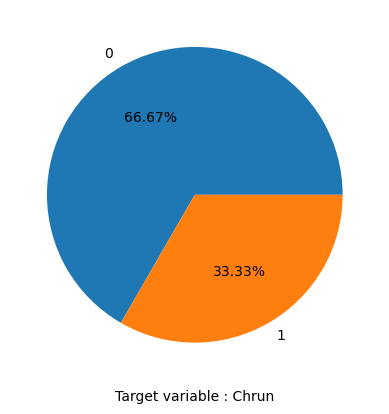

In [104]:
plt.pie(dfs['Churn'].value_counts(), radius=1, autopct='%.2f%%', labels= dfs['Churn'].unique())
plt.xlabel('Target variable : Chrun')

Inference:
==========
* Before resampling of data there is huge class imbalance in target variable with 12 percentage of '1' and 88 percentage of '0'
* After resampling of the data, using Smote the class '1' in taget variable is increased to 33.33 percentage (or) 1/3 rd of the Data

### Models After resampling the Data

In [105]:
x_train,x_test,y_train,y_test = train_test_split(xr,yr,train_size=0.7,random_state=8383)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((92484, 15), (39636, 15), (92484,), (39636,))

In [106]:
x_train

,curr_ann_amt,days_tenure,age_in_years,income,length_of_residence,cust_origin_year,city,state,county,has_children,marital_status,home_market_value,home_owner,college_degree,good_credit
117242,494.273333,294.306382,6.072441,97.255306,0.876442,0.567336,21,0,2,0,0,16,0,0,0
103625,367.558020,200.563320,5.581427,85.644233,2.885091,0.567336,21,0,1,1,0,17,0,1,0
18344,328.329827,179.670533,6.686536,106.810942,1.998022,0.567336,69,0,0,1,0,4,1,0,1
52728,428.815467,26.331227,5.442212,114.917851,5.200774,0.567336,5,0,13,0,1,8,1,0,1
24321,382.827665,286.769715,5.656420,106.810942,5.733835,0.567336,21,0,2,0,1,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55847,339.053795,139.942828,4.792906,111.762641,3.580548,0.567336,13,0,2,0,1,6,0,0,1
64243,381.898826,182.271582,5.656420,90.640057,2.469252,0.567336,21,0,2,0,0,3,1,0,0
85099,631.593616,294.306382,6.279615,161.847999,5.986978,0.567336,58,0,0,0,0,6,1,0,1
85905,339.787285,294.306382,6.117822,114.917851,5.986978,0.567336,33,0,13,0,0,17,1,0,1


In [107]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [108]:
x_train_s=pd.DataFrame(ss.fit_transform(x_train),columns=xtrain.columns)
x_test_s=pd.DataFrame(ss.fit_transform(x_test),columns=xtest.columns)

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
lr_RS=LogisticRegression()

In [111]:
lr_RS.fit(x_train_s,y_train)

LogisticRegression()

In [112]:
lr_RS.intercept_

array([-0.87988925])

In [113]:
pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(lr_RS.coef_))], axis = 1)

,0,0
0,curr_ann_amt,-0.013372
1,days_tenure,-3.891342
2,age_in_years,-0.138114
3,income,0.074864
4,length_of_residence,-0.028549
5,cust_origin_year,-3.267920
6,city,-0.046036
7,state,0.000000
8,county,-0.051679
9,has_children,-0.350247


In [114]:
ypred_lr_train_RS=lr_RS.predict(x_train_s)
ypred_lr_RS=lr_RS.predict(x_test_s)

In [115]:
print(accuracy_score(y_train,ypred_lr_train_RS))
print(confusion_matrix(y_train,ypred_lr_train_RS))
print(classification_report(y_train,ypred_lr_train_RS))

0.7695601401323472
[[55850  5875]
 [15437 15322]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84     61725
           1       0.72      0.50      0.59     30759

    accuracy                           0.77     92484
   macro avg       0.75      0.70      0.71     92484
weighted avg       0.76      0.77      0.76     92484



In [116]:
print(accuracy_score(y_test,ypred_lr_RS))
print(confusion_matrix(y_test,ypred_lr_RS))
print(classification_report(y_test,ypred_lr_RS))

0.7697799979816329
[[23918  2437]
 [ 6688  6593]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84     26355
           1       0.73      0.50      0.59     13281

    accuracy                           0.77     39636
   macro avg       0.76      0.70      0.72     39636
weighted avg       0.76      0.77      0.76     39636



In [117]:
# Resample(R.s)
update_performance(name = 'Logistic Regression (R.S)', model = lr_RS, test = y_test, pred= ypred_lr_RS)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009


In [118]:
from sklearn.neighbors import KNeighborsClassifier
KNN_RS=KNeighborsClassifier()

In [119]:
KNN_model_RS=KNN_RS.fit(x_train_s,y_train)

In [120]:
ypred_KNN_train_RS=KNN_model_RS.predict(x_train_s)
ypred_KNN_RS=KNN_model_RS.predict(x_test_s)

In [121]:
print(accuracy_score(y_train,ypred_KNN_train_RS))
print(confusion_matrix(y_train,ypred_KNN_train_RS))
print(classification_report(y_train,ypred_KNN_train_RS))

0.854493750270317
[[55233  6492]
 [ 6965 23794]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     61725
           1       0.79      0.77      0.78     30759

    accuracy                           0.85     92484
   macro avg       0.84      0.83      0.84     92484
weighted avg       0.85      0.85      0.85     92484



In [122]:
print(accuracy_score(y_test,ypred_KNN_RS))
print(confusion_matrix(y_test,ypred_KNN_RS))
print(classification_report(y_test,ypred_KNN_RS))

0.7824200222020385
[[22280  4075]
 [ 4549  8732]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     26355
           1       0.68      0.66      0.67     13281

    accuracy                           0.78     39636
   macro avg       0.76      0.75      0.75     39636
weighted avg       0.78      0.78      0.78     39636



In [123]:
update_performance(name = 'KNeighborsClassifier(R.S)', model = KNN_RS, test = y_test, pred= ypred_KNN_RS)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427


In [171]:
from sklearn.model_selection import GridSearchCV

In [172]:
grid_search = GridSearchCV(estimator=KNN_RS,param_grid={'n_neighbors' :[i for i in range(2,10)],
                                                     'p':[1,2]},scoring='accuracy',cv=5)

In [173]:
grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9], 'p': [1, 2]},
             scoring='accuracy')

In [174]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 1}

In [126]:
# tunned params for Knn: {'n_neighbors': 2, 'p': 1}

In [124]:
knn_RS = KNeighborsClassifier(n_neighbors=2,p=1)
knn_RS.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [125]:
ypred_knn_RS_t = knn_RS.predict(x_test)

In [126]:
print(accuracy_score(y_test,ypred_knn_RS_t))
print(confusion_matrix(y_test,ypred_knn_RS_t))
print(classification_report(y_test,ypred_knn_RS_t))

0.6092945806842265
[[23204  3151]
 [12335   946]]
              precision    recall  f1-score   support

           0       0.65      0.88      0.75     26355
           1       0.23      0.07      0.11     13281

    accuracy                           0.61     39636
   macro avg       0.44      0.48      0.43     39636
weighted avg       0.51      0.61      0.54     39636



In [127]:
update_performance(name = 'Knn(R.S) tunned', model = knn_RS, test = y_test, pred= ypred_knn_RS_t)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427
8,Knn(R.S) tunned,0.609295,0.071230,0.230901,0.108873


In [128]:
from sklearn.naive_bayes import GaussianNB
GNB_RS = GaussianNB()

In [129]:
GNB_model_RS = GNB_RS.fit(x_train_s,y_train)

In [130]:
ypred_GNB_RS=GNB_model_RS.predict(x_test_s)

In [131]:
print(accuracy_score(y_test,ypred_GNB_RS))
print(confusion_matrix(y_test,ypred_GNB_RS))
print(classification_report(y_test,ypred_GNB_RS))

0.7383691593500857
[[21548  4807]
 [ 5563  7718]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81     26355
           1       0.62      0.58      0.60     13281

    accuracy                           0.74     39636
   macro avg       0.71      0.70      0.70     39636
weighted avg       0.73      0.74      0.74     39636



In [132]:
update_performance(name = 'Gaussian naive bayes (RS)', model = GNB_RS, test = y_test, pred= ypred_GNB_RS)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427
8,Knn(R.S) tunned,0.609295,0.071230,0.230901,0.108873
9,Gaussian naive bayes (RS),0.738369,0.581131,0.616208,0.598155


In [133]:
from sklearn.tree import DecisionTreeClassifier
dt_RS = DecisionTreeClassifier(random_state=10)


In [134]:
dt_RS.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [135]:
ypred_dt_RS=dt_RS.predict(x_test)
ypred_train_dt_RS=dt_RS.predict(x_train)

In [136]:
print(accuracy_score(y_test,ypred_dt_RS))
print(confusion_matrix(y_test,ypred_dt_RS))
print(classification_report(y_test,ypred_dt_RS))


0.81685841154506
[[22525  3830]
 [ 3429  9852]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     26355
           1       0.72      0.74      0.73     13281

    accuracy                           0.82     39636
   macro avg       0.79      0.80      0.80     39636
weighted avg       0.82      0.82      0.82     39636



In [137]:
print(accuracy_score(y_train,ypred_train_dt_RS))
print(confusion_matrix(y_train,ypred_train_dt_RS))
print(classification_report(y_train,ypred_train_dt_RS))

1.0
[[61725     0]
 [    0 30759]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61725
           1       1.00      1.00      1.00     30759

    accuracy                           1.00     92484
   macro avg       1.00      1.00      1.00     92484
weighted avg       1.00      1.00      1.00     92484



In [138]:
update_performance(name = 'DecisionTreeClassifier(R.S) ', model = dt_RS, test = y_test, pred= ypred_dt_RS)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427
8,Knn(R.S) tunned,0.609295,0.071230,0.230901,0.108873
9,Gaussian naive bayes (RS),0.738369,0.581131,0.616208,0.598155


In [218]:
from sklearn.model_selection import GridSearchCV
tuned_paramaters = [{'criterion': ['entropy','gini'],
                     'max_depth': [2,3,5,6,7,8,9,10],
                     'max_leaf_nodes': [5,6,7,8],
                     'min_samples_leaf': [1,2,5,6,9],
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': [1,2,4,5,8]
                     
}]

In [219]:
dt_RS_T =DecisionTreeClassifier(random_state=10)
tree_grid_RS = GridSearchCV(estimator=dt_RS_T,param_grid=tuned_paramaters,cv=5)

In [220]:
tree_grid_model_RS = tree_grid_RS.fit(x_train, y_train)


In [221]:
print('Best parameters for decision tree classifier: ', tree_grid_model_RS.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [139]:
dt_grid_model_RS = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 5,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 7,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 10)

In [140]:
 dt_grid_model_RS.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=7, random_state=10)

In [141]:
ypred_dt_RS_tp = dt_grid_model_RS.predict(x_test)

In [142]:
print(accuracy_score(y_test,ypred_dt_RS_tp))
print(confusion_matrix(y_test,ypred_dt_RS_tp))
print(classification_report(y_test,ypred_dt_RS_tp))


0.7215157937228782
[[25164  1191]
 [ 9847  3434]]
              precision    recall  f1-score   support

           0       0.72      0.95      0.82     26355
           1       0.74      0.26      0.38     13281

    accuracy                           0.72     39636
   macro avg       0.73      0.61      0.60     39636
weighted avg       0.73      0.72      0.67     39636



In [143]:
update_performance(name = 'DecisionTreeClassifier(R.S) tunned ', model = dt_grid_model_RS, test = y_test, pred= ypred_dt_RS_tp)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427
8,Knn(R.S) tunned,0.609295,0.071230,0.230901,0.108873
9,Gaussian naive bayes (RS),0.738369,0.581131,0.616208,0.598155


In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
rf=RandomForestClassifier(random_state=10)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [146]:
ypred_rf = rf.predict(x_test)
ypred_rf_train=rf.predict(x_train)

In [147]:
print(accuracy_score(y_train,ypred_rf_train))
print(confusion_matrix(y_train,ypred_rf_train))
print(classification_report(y_train,ypred_rf_train))

0.9999891873188876
[[61725     0]
 [    1 30758]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61725
           1       1.00      1.00      1.00     30759

    accuracy                           1.00     92484
   macro avg       1.00      1.00      1.00     92484
weighted avg       1.00      1.00      1.00     92484



In [148]:
print(accuracy_score(y_test,ypred_rf))
print(confusion_matrix(y_test,ypred_rf))
print(classification_report(y_test,ypred_rf))

0.869462105156928
[[24840  1515]
 [ 3659  9622]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     26355
           1       0.86      0.72      0.79     13281

    accuracy                           0.87     39636
   macro avg       0.87      0.83      0.85     39636
weighted avg       0.87      0.87      0.87     39636



In [149]:
update_performance(name = 'Random-Forest (RS)', model = rf, test = y_test, pred=ypred_rf)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427
8,Knn(R.S) tunned,0.609295,0.071230,0.230901,0.108873
9,Gaussian naive bayes (RS),0.738369,0.581131,0.616208,0.598155


In [150]:
# Bagging Classifier

In [151]:
from sklearn.ensemble import BaggingClassifier

In [152]:
dt = DecisionTreeClassifier(random_state=10)
bc=BaggingClassifier(dt)
bc.fit(x_train,y_train)

ypred_bc=bc.predict(x_test)

print(accuracy_score(y_test,ypred_bc))
print(confusion_matrix(y_test,ypred_bc))
print(classification_report(y_test,ypred_bc))

0.8752144515087295
[[25016  1339]
 [ 3607  9674]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     26355
           1       0.88      0.73      0.80     13281

    accuracy                           0.88     39636
   macro avg       0.88      0.84      0.85     39636
weighted avg       0.88      0.88      0.87     39636



In [153]:
update_performance(name = 'BaggingClassifier DT (RS)', model = bc, test = y_test, pred=ypred_bc)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427
8,Knn(R.S) tunned,0.609295,0.071230,0.230901,0.108873
9,Gaussian naive bayes (RS),0.738369,0.581131,0.616208,0.598155


In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
knn = KNeighborsClassifier()
bag_knn=BaggingClassifier(knn)
bag_knn.fit(x_train,y_train)

ypred_bag_knn=bag_knn.predict(x_test)

print(accuracy_score(y_test,ypred_bag_knn))
print(confusion_matrix(y_test,ypred_bag_knn))
print(classification_report(y_test,ypred_bag_knn))

0.8116358865677666
[[21637  4718]
 [ 2748 10533]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85     26355
           1       0.69      0.79      0.74     13281

    accuracy                           0.81     39636
   macro avg       0.79      0.81      0.80     39636
weighted avg       0.82      0.81      0.81     39636



In [156]:
update_performance(name = 'BaggingClassifier-KNN (RS)', model = bag_knn, test = y_test, pred=ypred_bag_knn)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427
8,Knn(R.S) tunned,0.609295,0.071230,0.230901,0.108873
9,Gaussian naive bayes (RS),0.738369,0.581131,0.616208,0.598155


In [157]:
logr=LogisticRegression()
bag_logr = BaggingClassifier(logr,random_state=10)
bag_logr.fit(x_train,y_train)

ypred_bag_logr=bag_logr.predict(x_test)

print(accuracy_score(y_test,ypred_bag_logr))
print(confusion_matrix(y_test,ypred_bag_logr))
print(classification_report(y_test,ypred_bag_logr))

0.7474013523059845
[[23413  2942]
 [ 7070  6211]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.82     26355
           1       0.68      0.47      0.55     13281

    accuracy                           0.75     39636
   macro avg       0.72      0.68      0.69     39636
weighted avg       0.74      0.75      0.73     39636



In [158]:
update_performance(name = 'BaggingClassifier-logr (RS)', model = bag_logr, test = y_test, pred=ypred_bag_logr)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427
8,Knn(R.S) tunned,0.609295,0.071230,0.230901,0.108873
9,Gaussian naive bayes (RS),0.738369,0.581131,0.616208,0.598155


In [159]:
from sklearn.ensemble import AdaBoostClassifier

In [160]:
abcl = AdaBoostClassifier(dt,random_state=10)
abcl.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=10),
                   random_state=10)

In [161]:
ypred_abcl=abcl.predict(x_test)

In [162]:
print(accuracy_score(y_test,ypred_abcl))
print(confusion_matrix(y_test,ypred_abcl))
print(classification_report(y_test,ypred_abcl))

0.8183217277222726
[[22603  3752]
 [ 3449  9832]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     26355
           1       0.72      0.74      0.73     13281

    accuracy                           0.82     39636
   macro avg       0.80      0.80      0.80     39636
weighted avg       0.82      0.82      0.82     39636



In [163]:
update_performance(name = 'AdaBoostClassifier-Descision tree (RS)', model = abcl, test = y_test, pred=ypred_abcl)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427
8,Knn(R.S) tunned,0.609295,0.071230,0.230901,0.108873
9,Gaussian naive bayes (RS),0.738369,0.581131,0.616208,0.598155


In [164]:
rf=RandomForestClassifier()
abcl_rf = AdaBoostClassifier(rf,random_state=10)
abcl_rf.fit(x_train,y_train)
ypred_abcl_rf=abcl_rf.predict(x_test)

In [165]:
print(accuracy_score(y_test,ypred_abcl_rf))
print(confusion_matrix(y_test,ypred_abcl_rf))
print(classification_report(y_test,ypred_abcl_rf))

0.8688313654253709
[[24829  1526]
 [ 3673  9608]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     26355
           1       0.86      0.72      0.79     13281

    accuracy                           0.87     39636
   macro avg       0.87      0.83      0.85     39636
weighted avg       0.87      0.87      0.87     39636



In [166]:
update_performance(name = 'AdaBoostClassifier-Random Forest(RS)', model = abcl_rf, test = y_test, pred=ypred_abcl_rf)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427
8,Knn(R.S) tunned,0.609295,0.071230,0.230901,0.108873
9,Gaussian naive bayes (RS),0.738369,0.581131,0.616208,0.598155


In [167]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50,learning_rate=0.5,random_state=10)
gbcl.fit(x_train,y_train)
ypred_gbcl=gbcl.predict(x_test)
print(accuracy_score(y_test,ypred_gbcl))
print(confusion_matrix(y_test,ypred_gbcl))
print(classification_report(y_test,ypred_gbcl))

0.8951710566151984
[[25308  1047]
 [ 3108 10173]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     26355
           1       0.91      0.77      0.83     13281

    accuracy                           0.90     39636
   macro avg       0.90      0.86      0.88     39636
weighted avg       0.90      0.90      0.89     39636



In [168]:
update_performance(name = 'GradientBoostingClassifier(RS)',model=gbcl,test=y_test,pred=ypred_gbcl)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427
8,Knn(R.S) tunned,0.609295,0.071230,0.230901,0.108873
9,Gaussian naive bayes (RS),0.738369,0.581131,0.616208,0.598155


In [169]:
from xgboost import XGBClassifier

In [170]:
xgb=XGBClassifier(random_state=10)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [171]:
ypred_xgb=xgb.predict(x_test)
print(accuracy_score(y_test,ypred_xgb))

0.9046069229992936


In [172]:
update_performance(name = 'XGB (RS)',model=gbcl,test=y_test,pred=ypred_xgb)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427
8,Knn(R.S) tunned,0.609295,0.071230,0.230901,0.108873
9,Gaussian naive bayes (RS),0.738369,0.581131,0.616208,0.598155


In [173]:
# Resample data models
perf_score.loc[6:,:]

,Model,Accuracy,Recall,Precision,F1 Score
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427
8,Knn(R.S) tunned,0.609295,0.071230,0.230901,0.108873
9,Gaussian naive bayes (RS),0.738369,0.581131,0.616208,0.598155
10,DecisionTreeClassifier(R.S),0.816858,0.741812,0.720070,0.730779
11,DecisionTreeClassifier(R.S) tunned,0.721516,0.258565,0.742486,0.383559
12,Random-Forest (RS),0.869462,0.724494,0.863967,0.788107
13,BaggingClassifier DT (RS),0.875214,0.728409,0.878416,0.796411
14,BaggingClassifier-KNN (RS),0.811636,0.793088,0.690643,0.738329
15,BaggingClassifier-logr (RS),0.747401,0.467661,0.678575,0.553713


In [174]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.883267,0.059227,0.491686,0.105720
1,KNN,0.876367,0.131330,0.405477,0.198401
2,KNN-Tunned,0.883500,0.000000,0.000000,0.000000
3,Gaussian naive bayes,0.878933,0.297854,0.469130,0.364368
4,DecisionTreeClassifier,0.808100,0.263519,0.224415,0.242400
5,DecisionTreeClassifier tunned,0.883500,0.000000,0.000000,0.000000
6,Logistic Regression (R.S),0.769780,0.496423,0.730122,0.591009
7,KNeighborsClassifier(R.S),0.782420,0.657481,0.681815,0.669427
8,Knn(R.S) tunned,0.609295,0.071230,0.230901,0.108873
9,Gaussian naive bayes (RS),0.738369,0.581131,0.616208,0.598155


In [185]:
model=list(perf_score[0:6]['Model'])

In [178]:
before=list(perf_score[0:6]['F1 Score'])

In [190]:
after=(perf_score[6:12]['F1 Score'])

In [199]:
dif=pd.DataFrame({'Model':model,'Before':before,'After':after})

In [200]:
dif

,Model,Before,After
6,LogisticReg-Base,0.105720,0.591009
7,KNN,0.198401,0.669427
8,KNN-Tunned,0.000000,0.108873
9,Gaussian naive bayes,0.364368,0.598155
10,DecisionTreeClassifier,0.242400,0.730779
11,DecisionTreeClassifier tunned,0.000000,0.383559


In [220]:
# Before and After resampling of the model

<AxesSubplot:xlabel='Model'>

<Figure size 2500x1500 with 0 Axes>

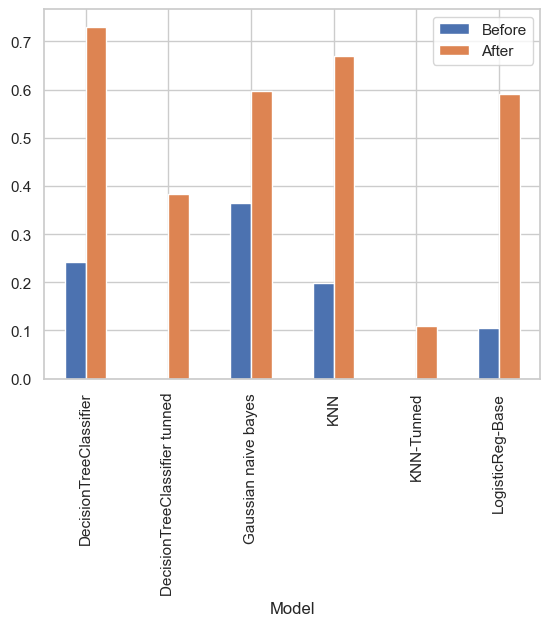

In [217]:
plt.figure(figsize=(25,15))
dif.groupby('Model')[['Before','After']].sum().plot(kind='bar')

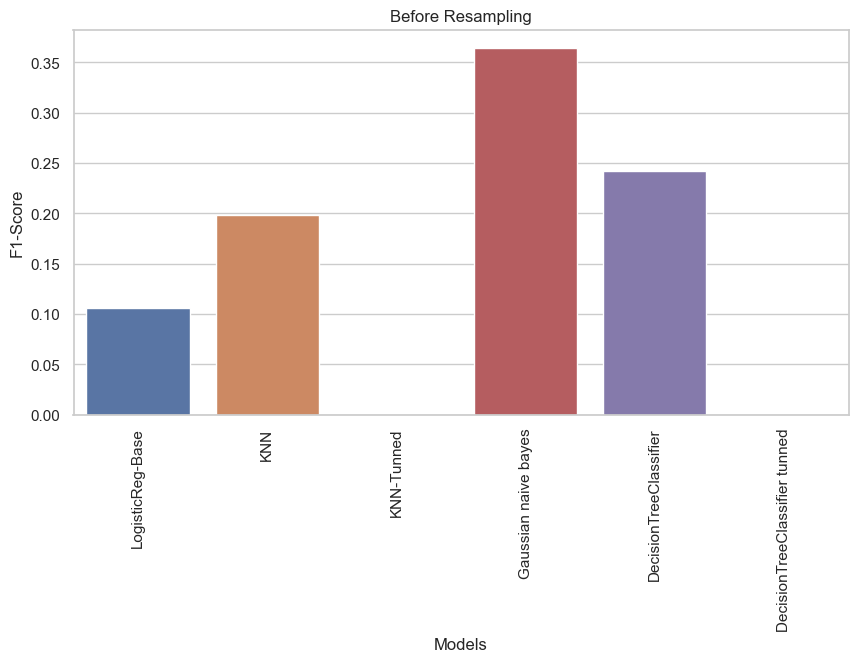

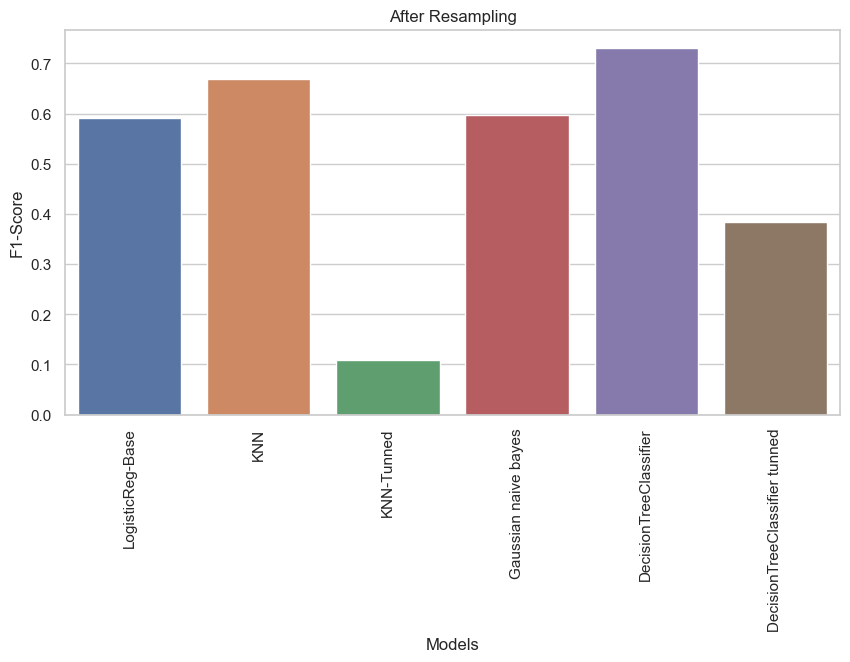

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=dif['Model'], y=dif['Before'])
ax.set(xlabel='Models', ylabel='F1-Score')
plt.xticks(rotation=90)
plt.title('Before Resampling')
plt.show()

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=dif['Model'], y=dif['After'])
ax.set(xlabel='Models', ylabel='F1-Score')
plt.xticks(rotation=90)
plt.title('After Resampling')
plt.show()


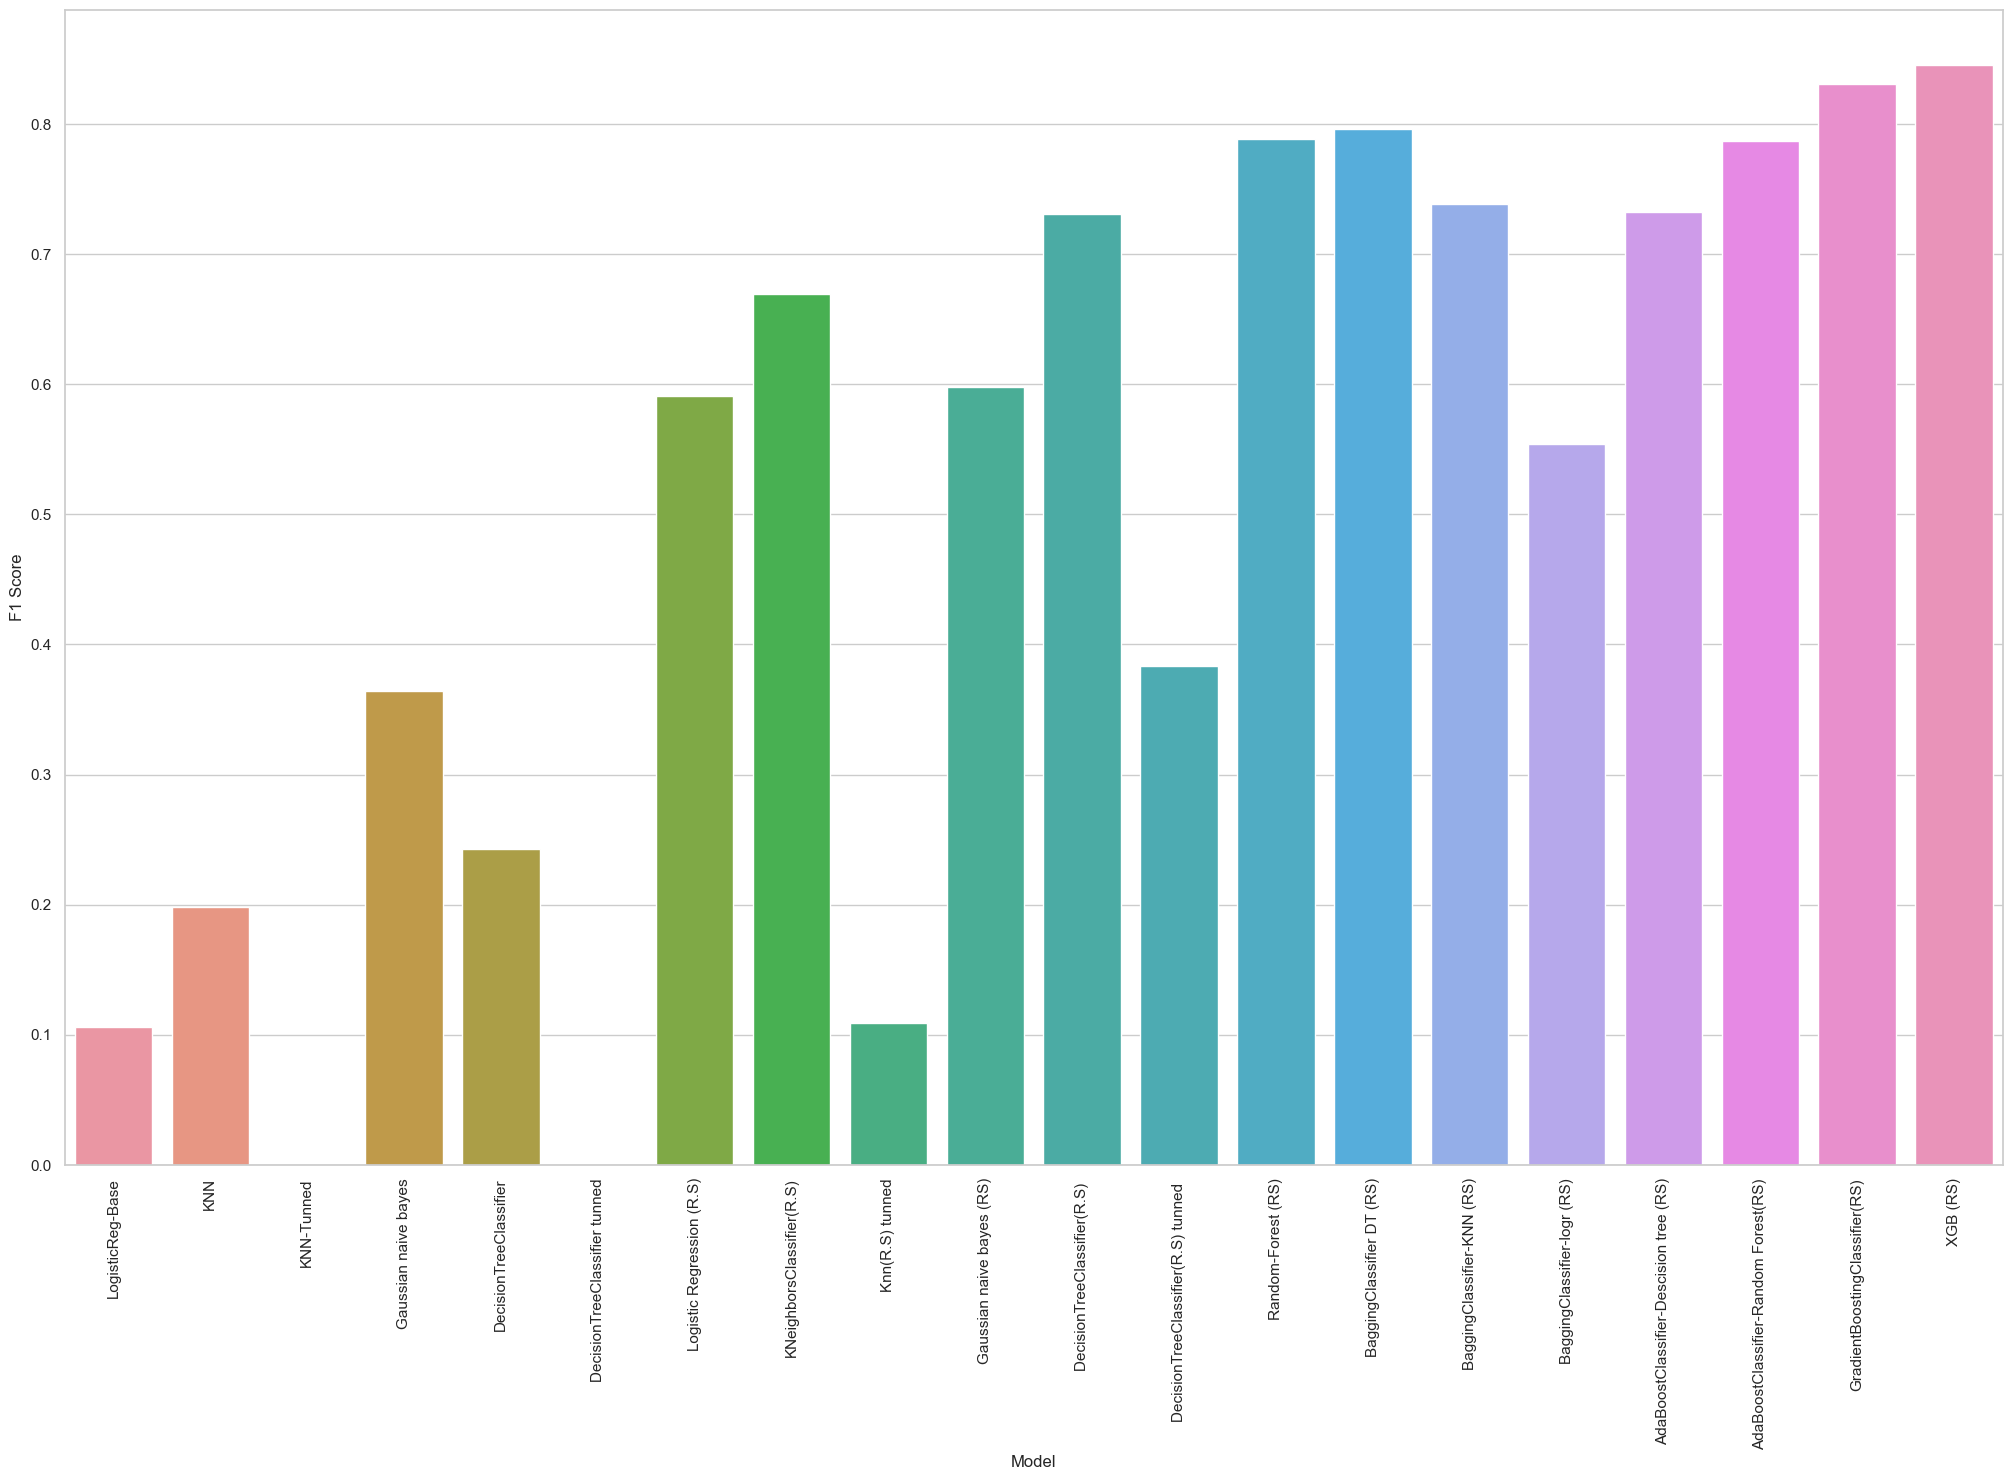

In [176]:
plt.figure(figsize=(25,15))
sns.barplot(x=perf_score['Model'], y=perf_score['F1 Score'])
plt.xticks(rotation=90)
plt.show()

Inference:
-----------
* The models build with out resampling of the data have poor models Considering F1 scores
* After Resampling of the data the performence of the models grdually increasted with highest scores from XGB model